In [1]:
# Importing necessary libraries for all parts of the lab 
import numpy as np
from scipy import stats
from astropy.io import fits
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from astropy.modeling import models, fitting

##### Section 1.1: Dark subtraction

In [2]:
def read_fits_range(file_template, start_idx, end_idx):
    """
    Read a range of FITS files based on the template and indices.

    :param file_template: Template path for the FITS files with placeholders for the frame number.
    :type file_template: str
    :param start_idx: The starting index for the FITS files.
    :type start_idx: int
    :param end_idx: The ending index for the FITS files.
    :type end_idx: int
    :return: A list of tuples containing headers and data for each FITS file.
    :rtype: list of tuples
    """
    frames_info = []
    for i in range(start_idx, end_idx + 1):
        file_path = file_template.format(i)
        with fits.open(file_path) as hdul:
            header = hdul[0].header
            data = hdul[0].data
            frames_info.append((header, data))
    return frames_info

In [3]:
def read_calibration_fits(bias_file_template, bias_start_index, bias_end_index,
                          dark_file_template, dark_start_index, dark_end_index,
                          flat_file_template, arc_lamp_file_template, start_index, end_index):
    """
    Read calibration FITS files for bias frames, dark frames, flat fields, and mercury arc lamp spectrum.

    :param bias_file_template: Template path for the bias frames with placeholders for the frame number.
    :type bias_file_template: str
    :param bias_start_index: The starting index for the bias frames.
    :type bias_start_index: int
    :param bias_end_index: The ending index for the bias frames.
    :type bias_end_index: int
    :param dark_file_template: Template path for the dark frames with placeholders for the frame number.
    :type dark_file_template: str
    :param dark_start_index: The starting index for the dark frames.
    :type dark_start_index: int
    :param dark_end_index: The ending index for the dark frames.
    :type dark_end_index: int
    :param flat_file_template: Template path for the flat field frames with placeholders for the frame number.
    :type flat_file_template: str
    :param arc_lamp_file_template: Template path for the mercury arc lamp spectrum frames with placeholders for the frame number.
    :type arc_lamp_file_template: str
    :param start_index: The starting index for both the flat fields and mercury arc lamp spectrum frames.
    :type start_index: int
    :param end_index: The ending index for both the flat fields and mercury arc lamp spectrum frames.
    :type end_index: int
    :return: A tuple containing lists of headers and data for bias frames, dark frames, flat fields, and arc lamp spectrum.
    :rtype: tuple (list of tuples, list of tuples, list of tuples, list of tuples)
    """
    bias_frames = read_fits_range(bias_file_template, bias_start_index, bias_end_index)
    dark_frames = read_fits_range(dark_file_template, dark_start_index, dark_end_index)
    flat_fields = read_fits_range(flat_file_template, start_index, end_index)
    arc_lamp_spectrum = read_fits_range(arc_lamp_file_template, start_index, end_index)

    return bias_frames, dark_frames, flat_fields, arc_lamp_spectrum

# Templates for the file names
bias_file_template = r"..\FITS_files\bias_frames_all_stars.{:08d}.BIAS.FIT"
dark_file_template = r"..\FITS_files\dark_frames_all_stars.{:08d}.DARK.FIT"
flat_file_template = r"..\FITS_files\flat_fields_all_stars_USETHIS.{:08d}.FIT"
arc_lamp_file_template = r"..\FITS_files\arc_lamp_merc_calibration.{:08d}.FIT"

# Define the starting and ending indices
bias_start_index = 2
bias_end_index = 11
dark_start_index = 0
dark_end_index = 1
start_index = 0  # For flat fields and mercury arc lamp spectrum
end_index = 9    # For flat fields and mercury arc lamp spectrum

# Calling the function
bias_frames, dark_frames, flat_fields, arc_lamp_spectrum = read_calibration_fits(
    bias_file_template, bias_start_index, bias_end_index,
    dark_file_template, dark_start_index, dark_end_index,
    flat_file_template, arc_lamp_file_template, start_index, end_index
)

In [4]:
def read_spectra_fits(star_file_templates, start_index, end_index):
    """
    Read FITS files for spectral data of seven stars.

    :param star_file_templates: List of template paths for each star's spectral FITS files, with placeholders for the frame number.
    :type star_file_templates: list of str
    :param start_index: The starting index for the frames for all stars.
    :type start_index: int
    :param end_index: The ending index for the frames for all stars.
    :type end_index: int
    :return: Seven variables, each containing lists of headers and data for a star's spectra.
    :rtype: tuple of lists of tuples
    """
    # Read the spectral frames for each star
    star1_frames = read_fits_range(star_file_templates[0], start_index, end_index)
    star2_frames = read_fits_range(star_file_templates[1], start_index, end_index)
    star3_frames = read_fits_range(star_file_templates[2], start_index, end_index)
    star4_frames = read_fits_range(star_file_templates[3], start_index, end_index)
    star5_frames = read_fits_range(star_file_templates[4], start_index, end_index)
    star6_frames = read_fits_range(star_file_templates[5], start_index, end_index)
    star7_frames = read_fits_range(star_file_templates[6], start_index, end_index)

    return star1_frames, star2_frames, star3_frames, star4_frames, star5_frames, star6_frames, star7_frames

# Templates for each star's spectral FITS file names
star_file_templates = [
    r"..\FITS_files\Vega_Class_A_USETHIS.{:08d}.FIT",                  # First star/spectrophotometric star
    r"..\FITS_files\Bet_Peg_M_star_Fourth_Star.{:08d}.FIT",            # Second star
    r"..\FITS_files\Alf_Per_F_star_First_Star_USETHIS.{:08d}.FIT",     # Third star
    r"..\FITS_files\Bet_Per_B_Class_Third_Star_USETHIS.{:08d}.FIT",    # Fourth star
    r"..\FITS_files\Alf_Cas_K_star_Second_Star_USETHIS.{:08d}.FIT",    # Fifth star
    r"..\FITS_files\Alf_Aur_G_star_Fifth_Star_USETHIS.{:08d}.FIT",     # Sixth star
    r"..\FITS_files\ksi_Per_O_star_Sixth_Star_USETHIS.{:08d}.FIT"      # Seventh star
]

# Define the starting and ending indices for star spectra files
start_index = 0
end_index = 1

# Calling the function to read the spectral frames
star1_frames, star2_frames, star3_frames, star4_frames, star5_frames, star6_frames, star7_frames = read_spectra_fits(star_file_templates, start_index, end_index)

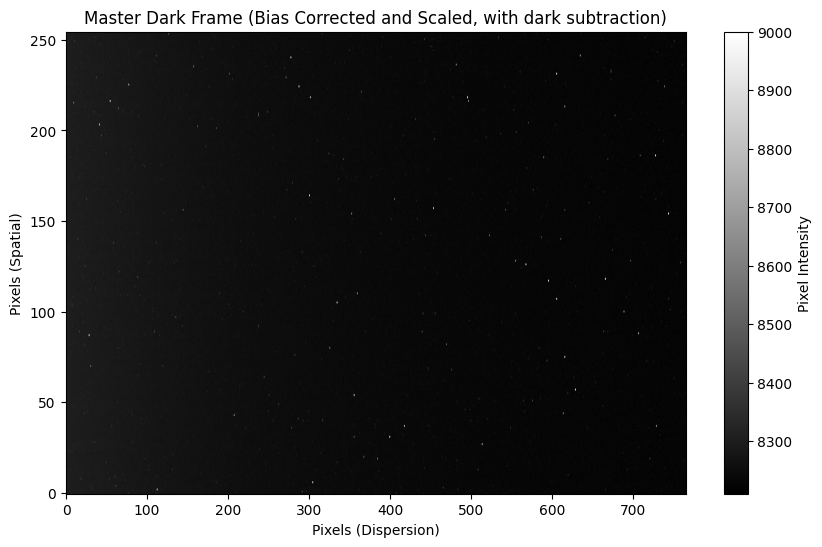

In [46]:
def create_master_dark(dark_frames, bias_frames, exposure_time, dark_exposure_time, row_start=50,row_end=90):
    """
    THIS IS THE CORRECT DARK SUBTRACTION !!!
    
    Create a master dark frame by median-combining the dark frames, subtracting the master bias frame,
    scaling by the exposure time ratio, and adding back the bias frame.

    :param dark_frames: List of tuples containing headers and data for the dark FITS frames.
                        Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type dark_frames: list of tuples
    :param bias_frames: List of tuples containing headers and data for the bias FITS frames.
                        Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type bias_frames: list of tuples
    :param exposure_time: Exposure time of the science images in seconds.
    :type exposure_time: float
    :param dark_exposure_time: Exposure time of the dark frames in seconds.
    :type dark_exposure_time: float
    :return: Master dark frame after bias correction and scaling.
    :rtype: np.ndarray
    """
    # Create the master dark frame by median-combining the dark frames
    dark_data_list = [frame[1] for frame in dark_frames]  # Extract the 'data' part from each dark frame
    master_dark = np.median(np.stack(dark_data_list), axis=0)
    # Create the master bias frame by median-combining the bias frames
    bias_data_list = [frame[1] for frame in bias_frames]  # Extract the 'data' part from each bias frame
    master_bias = np.median(np.stack(bias_data_list), axis=0)
    # Subtract the master bias frame from the master dark frame
    master_dark_corrected = master_dark - master_bias
    # Scale the corrected master dark frame by (exposure_time / dark_exposure_time)
    scaling_factor = exposure_time / dark_exposure_time
    master_dark_corrected *= scaling_factor
    # Add back the master bias frame
    master_dark_corrected += master_bias
    # Filter the master dark frame
    master_dark_corrected[master_dark_corrected > 9000] = 9000  # Clamp values above 9000

    # Plotting the master dark frame with a maximum value of 9000
    plt.figure(figsize=(10, 6))
    plt.imshow(master_dark_corrected, cmap='gray', origin='lower', aspect='auto')
    plt.colorbar(label='Pixel Intensity')
    plt.xlabel('Pixels (Dispersion)')
    plt.ylabel('Pixels (Spatial)')
    plt.title('Master Dark Frame (Bias Corrected and Scaled, with dark subtraction)')
    plt.grid(False)
    plt.show()

    return master_dark_corrected


# Example call to the function 
master_dark_corrected = create_master_dark(dark_frames, bias_frames, exposure_time=15, dark_exposure_time=200)

In [38]:
def create_median_images(spectra_frames, master_dark_corrected, row_start=0, row_end=110):
    """
    Subtract the master dark frame from each star's frames, crop the y-axis to the specified spectral region,
    and compute the median image for each star.

    :param spectra_frames: A tuple containing lists of headers and data for each star's spectra.
                           Each list contains tuples of (header, data), where `data` is a 2D numpy array.
    :type spectra_frames: tuple of lists of tuples
    :param master_dark_corrected: The master dark frame to be subtracted.
    :type master_dark_corrected: np.ndarray
    :param row_start: The starting index for the row range (y-axis) to crop the image.
    :type row_start: int
    :param row_end: The ending index for the row range (y-axis) to crop the image.
    :type row_end: int
    :return: A list of median images for each star after dark subtraction and cropping.
    :rtype: list of np.ndarray
    """
    median_images = []
    # Subtract the master dark from each star's frames, crop the spectral region, and compute the median
    for frames in spectra_frames:
        star_data_list = [frame[1] for frame in frames]  # Extract the 'data' part from each star frame
        corrected_images = [data - master_dark_corrected for data in star_data_list]  # Subtract the master dark
        cropped_images = [img[row_start:row_end, :] for img in corrected_images]  # Crop the y-axis
        # Compute the median image for the cropped spectral region
        median_image = np.median(np.stack(cropped_images), axis=0)
        median_images.append(median_image)

    return median_images

# Example call to the function
spectra_frames = (star1_frames, star2_frames, star3_frames, star4_frames, star5_frames, star6_frames, star7_frames)
median_images = create_median_images(spectra_frames, master_dark_corrected)

# Optional: Plot the cropped median images for each star
# for i, median_image in enumerate(median_images):
    # plt.figure(figsize=(10, 6))
    # plt.imshow(median_image, cmap='gray', origin='lower', aspect='auto')
    # plt.colorbar(label='Pixel Intensity')
    # plt.title(f'Cropped Median Image for Star {i+1} (Rows {0} to {110})')
    # plt.xlabel('Pixels (Dispersion)')
    # plt.ylabel('Pixels (Spatial)')
    # plt.grid(False)
    # plt.show()

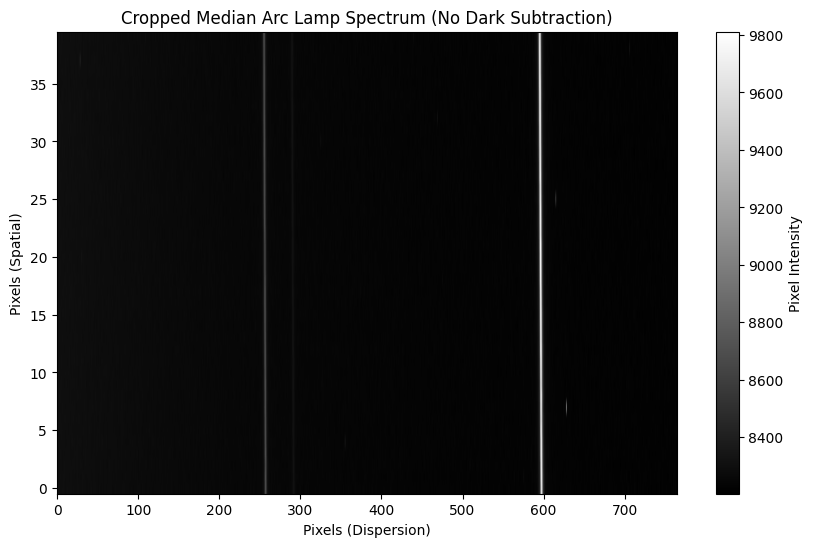

In [39]:
def create_median_arc_spectrum(arc_lamp_spectrum, row_start=50, row_end=90):
    """
    Compute the median arc lamp spectrum by cropping the y-axis to the specified spectral region 
    without subtracting the master dark frame.

    :param arc_lamp_spectrum: List of tuples containing headers and data for the arc lamp spectrum.
                              Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type arc_lamp_spectrum: list of tuples
    :param row_start: The starting index for the row range (y-axis) to crop the spectrum.
    :type row_start: int
    :param row_end: The ending index for the row range (y-axis) to crop the spectrum.
    :type row_end: int
    :return: Median arc lamp spectrum after cropping.
    :rtype: np.ndarray
    """
    # Extract the 'data' part from each arc lamp frame
    arc_data_list = [frame[1] for frame in arc_lamp_spectrum]
    # Crop the y-axis of each arc lamp frame
    cropped_arc_data_list = [data[row_start:row_end, :] for data in arc_data_list]
    # Compute the median of the cropped arc lamp spectra (no dark subtraction)
    median_arc_spectrum = np.median(np.stack(cropped_arc_data_list), axis=0)
    return median_arc_spectrum

# Calling the function
median_arc_spectrum = create_median_arc_spectrum(arc_lamp_spectrum)

# Optional: Plot the median arc lamp spectrum
plt.figure(figsize=(10, 6))
plt.imshow(median_arc_spectrum, cmap='gray', origin='lower', aspect='auto')
plt.colorbar(label='Pixel Intensity')
plt.xlabel('Pixels (Dispersion)')
plt.ylabel('Pixels (Spatial)')
plt.title('Cropped Median Arc Lamp Spectrum (No Dark Subtraction)')
plt.grid(False)
plt.show()

##### Section 1.2: Flat-Fielding

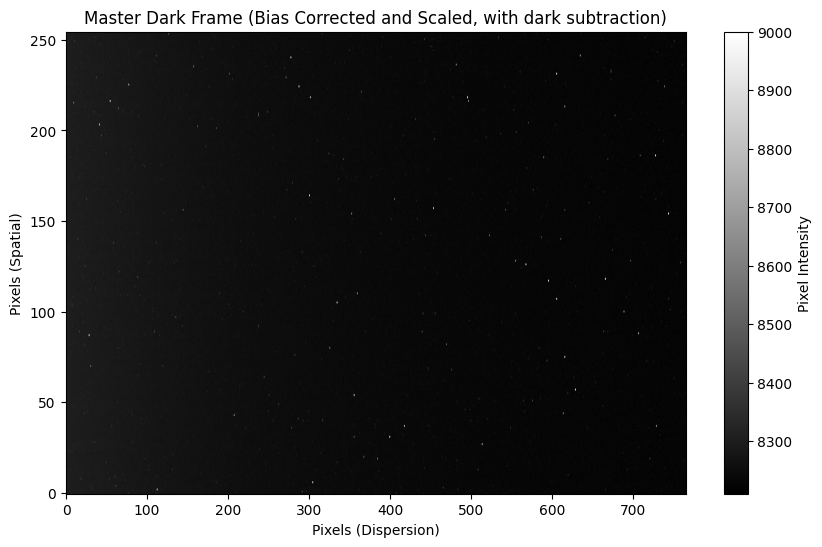

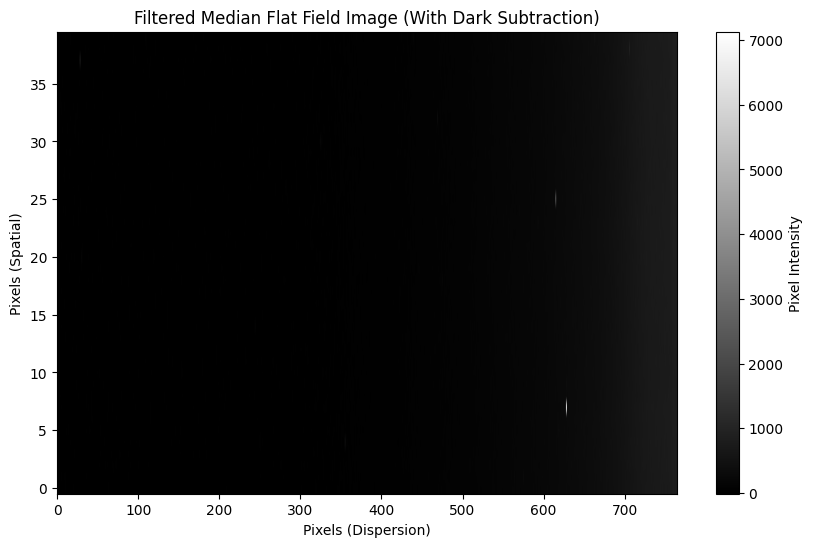

In [45]:
def median_flat_field(flat_fields, dark_frames, bias_frames, exposure_time, dark_exposure_time, row_start=50, row_end=90):
    """
    Compute the median flat field image by subtracting the master dark frame (with bias correction),
    crop the y-axis to the specified region, and clamp values above 9000.

    :param flat_fields: List of tuples containing headers and 2D numpy array data for flat field frames.
    :type flat_fields: list of tuples
    :param dark_frames: List of tuples containing headers and data for the dark FITS frames.
                        Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type dark_frames: list of tuples
    :param bias_frames: List of tuples containing headers and data for the bias FITS frames.
                        Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type bias_frames: list of tuples
    :param exposure_time: Exposure time of the science images in seconds.
    :type exposure_time: float
    :param dark_exposure_time: Exposure time of the dark frames in seconds.
    :type dark_exposure_time: float
    :param row_start: The starting index for the row range (y-axis) to crop the flat fields.
    :type row_start: int
    :param row_end: The ending index for the row range (y-axis) to crop the flat fields.
    :type row_end: int
    :return: The median flat field image cropped to the specified region and filtered after dark subtraction.
    :rtype: np.ndarray
    """
    # Create the master dark frame using the provided function
    master_dark_corrected = create_master_dark(dark_frames, bias_frames, exposure_time, dark_exposure_time)

    # Extract the 'data' part from each flat field frame and crop the y-axis
    flat_field_data_list = [frame[1][row_start:row_end, :] for frame in flat_fields]
    
    # Create the median flat field image from the flat fields (before dark subtraction)
    median_flat_field_image = np.median(np.stack(flat_field_data_list), axis=0)

    # Subtract the master dark frame from the median flat field image
    median_flat_field_image -= master_dark_corrected[row_start:row_end, :]  # Adjusting for cropped dimensions

    # Clamp values above 9000
    median_flat_field_image[median_flat_field_image > 9000] = 9000
    
    return median_flat_field_image

# Calling the function
median_flat_field_image = median_flat_field(flat_fields, dark_frames, bias_frames, exposure_time=15, dark_exposure_time=200)

# Optional: Plotting the filtered median flat field image
plt.figure(figsize=(10, 6))
plt.imshow(median_flat_field_image, cmap='gray', origin='lower', aspect='auto')
plt.colorbar(label='Pixel Intensity')
plt.xlabel('Pixels (Dispersion)')
plt.ylabel('Pixels (Spatial)')
plt.title('Filtered Median Flat Field Image (With Dark Subtraction)')
plt.grid(False)
plt.show()

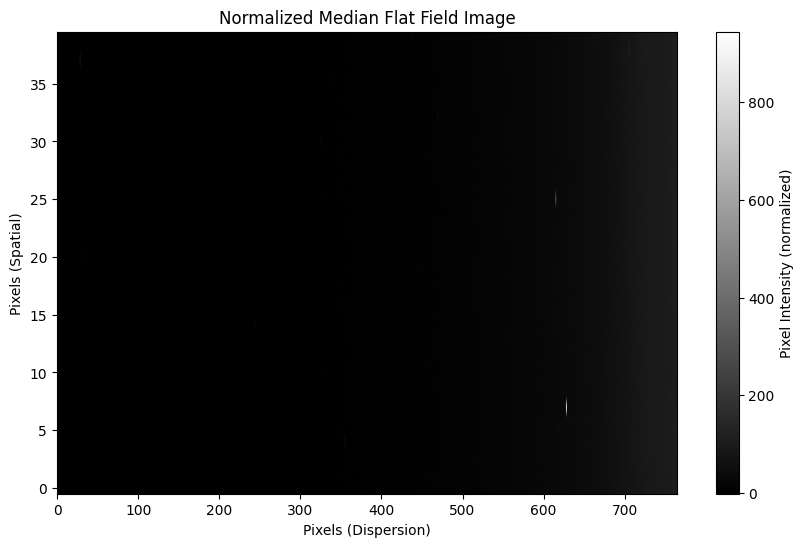

In [44]:
def normalize_flat_field(median_flat_field_image):
    """
    Normalize the median flat field image by dividing it by its mode.

    :param median_flat_field_image: The median flat field image to be normalized.
    :type median_flat_field_image: np.ndarray
    :return: The normalized median flat field image.
    :rtype: np.ndarray
    """
    # Calculate the mode for normalization
    mode_value = stats.mode(median_flat_field_image, axis=None, keepdims=True).mode[0]
    # Normalize the median flat field by dividing by its mode
    if mode_value != 0:  # Avoid division by zero
        normalized_flat_field = median_flat_field_image / mode_value
    else:
        print("Mode value is zero, skipping normalization.")
        normalized_flat_field = median_flat_field_image

    return normalized_flat_field

# Calling the function 
normalized_flat_field_image = normalize_flat_field(median_flat_field_image)

# Optional: Plotting the normalized median flat field image
plt.figure(figsize=(10, 6))
plt.imshow(normalized_flat_field_image, cmap='gray', origin='lower', aspect='auto')
plt.colorbar(label='Pixel Intensity (normalized)')
plt.xlabel('Pixels (Dispersion)')
plt.ylabel('Pixels (Spatial)')
plt.title('Normalized Median Flat Field Image')
plt.grid(False)
plt.show()

##### Section 1.3: Normalize each spectrum to flat-field spectrum

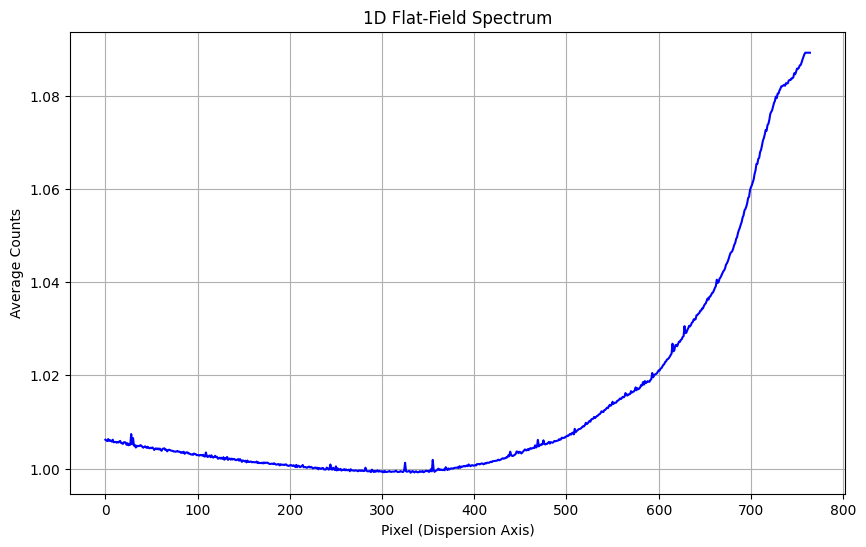

In [10]:
def collapse_flat_field_1d(normalized_flat_field_image):
    """
    Collapse the 2D normalized flat field image to a 1D spectrum
    by averaging the counts in each column.

    :param normalized_flat_field_image: The normalized median flat field image.
    :type normalized_flat_field_image: np.ndarray
    :return: 1D array of averaged counts.
    :rtype: np.ndarray
    """
    # Collapse the 2D image to a 1D array by taking the mean of each column
    flat_1d = np.mean(normalized_flat_field_image, axis=0)
    # Plot the 1D flat-field values against pixel positions
    plt.figure(figsize=(10, 6))
    plt.plot(flat_1d, color='blue')
    plt.title('1D Flat-Field Spectrum')
    plt.xlabel('Pixel (Dispersion Axis)')
    plt.ylabel('Average Counts')
    plt.grid(True)
    plt.show()

    return flat_1d

# Calling the function
flat_1d = collapse_flat_field_1d(normalized_flat_field_image)

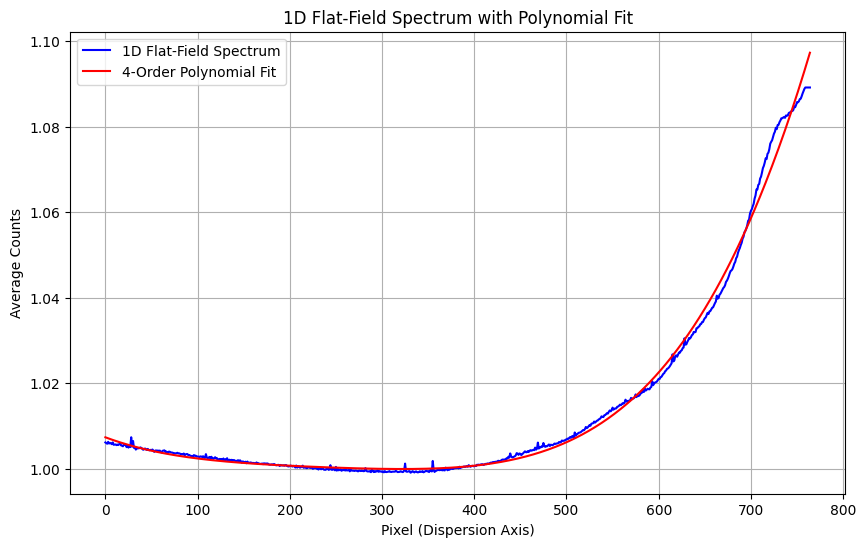

In [11]:
def fit_polynomial_to_flat_field(flat_1d, degree=4):
    """
    Fit a polynomial to the 1D flat-field spectrum and plot the results.

    :param flat_1d: The 1D array of averaged counts from the flat-field image.
    :type flat_1d: np.ndarray
    :param degree: The degree of the polynomial to fit (default is 4).
    :type degree: int
    :return: Coefficients of the fitted polynomial.
    :rtype: np.ndarray
    """
    # Fit a polynomial to the 1D flat-field data
    x_axis = np.arange(len(flat_1d))
    polynomial_fit = Polynomial.fit(x_axis, flat_1d, deg=degree)
    # Evaluate the polynomial fit
    fit_values = polynomial_fit(x_axis)
    # Plot the 1D flat-field values and the polynomial fit
    plt.figure(figsize=(10, 6))
    plt.plot(flat_1d, label='1D Flat-Field Spectrum', color='blue')
    plt.plot(fit_values, label=f'{degree}-Order Polynomial Fit', color='red')
    plt.title('1D Flat-Field Spectrum with Polynomial Fit')
    plt.xlabel('Pixel (Dispersion Axis)')
    plt.ylabel('Average Counts')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the polynomial coefficients
    return polynomial_fit.convert().coef

# Example call
polynomial_coefficients = fit_polynomial_to_flat_field(flat_1d)

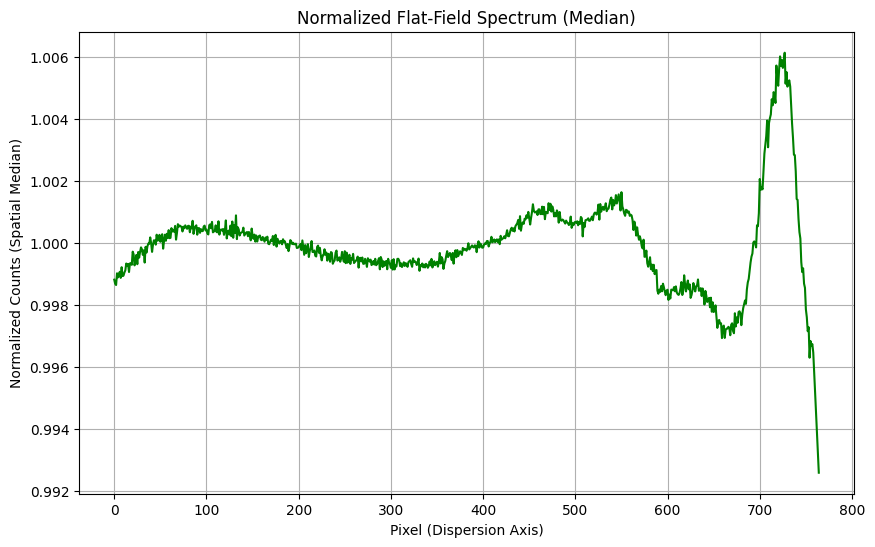

In [12]:
def normalize_flat_field_2d(normalized_flat_field_image, polynomial_coefficients):
    """
    Normalize the 2D flat-field image by dividing each row by the fitted polynomial.

    :param normalized_flat_field_image: The 2D array representing the normalized flat-field image.
    :type normalized_flat_field_image: np.ndarray
    :param polynomial_coefficients: Coefficients of the fitted polynomial.
    :type polynomial_coefficients: np.ndarray
    :return: The normalized flat-field image.
    :rtype: np.ndarray
    """
    # Generate the x-axis corresponding to the columns of the flat field
    x_axis = np.arange(normalized_flat_field_image.shape[1])
    # Evaluate the polynomial fit at each x position
    polynomial_fit_values = Polynomial(polynomial_coefficients)(x_axis)
    # Normalize the flat field by dividing each row by the polynomial fit values
    normalized_flat_field_poly = np.array([i / polynomial_fit_values for i in normalized_flat_field_image])

    # Plot the median normalized flat field along the dispersion axis
    plt.figure(figsize=(10, 6))
    plt.plot(np.median(normalized_flat_field_poly, axis=0), color='green')
    plt.title('Normalized Flat-Field Spectrum (Median)')
    plt.xlabel('Pixel (Dispersion Axis)')
    plt.ylabel('Normalized Counts (Spatial Median)')
    plt.grid(True)
    plt.show()

    return normalized_flat_field_poly

# Example call
normalized_flat_field_poly = normalize_flat_field_2d(normalized_flat_field_image, polynomial_coefficients)

TypeError: Invalid shape (40, 40, 765) for image data

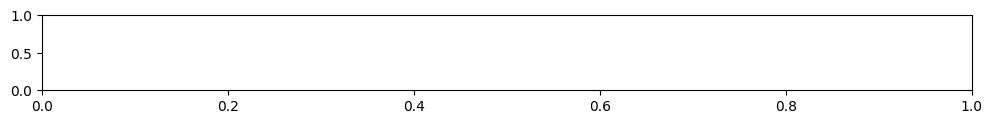

In [36]:
def correct_science_images(spectra_frames, normalized_flat_field_from_polynomial, row_start=50, row_end=90):
    """
    Correct each science image by dividing it by the normalized flat field from polynomial fitting
    and cropping the spectra frames.

    :param spectra_frames: A tuple containing lists of headers and data for each star's spectra.
                          Each list contains tuples of (header, data).
    :type spectra_frames: tuple of lists of tuples
    :param normalized_flat_field_from_polynomial: The normalized 1D flat-field array to divide by.
    :type normalized_flat_field_from_polynomial: np.ndarray
    :param row_start: Starting row index for cropping.
    :type row_start: int
    :param row_end: Ending row index for cropping.
    :type row_end: int
    :return: A list of corrected and cropped science images for each star.
    :rtype: list of np.ndarray
    """
    corrected_images = []
    
    # Iterate over each star's frames
    for frames in spectra_frames:
        # Extract the 'data' part from each star frame
        star_data_list = [frame[1] for frame in frames]  
        # Calculate the median image across the star data
        median_star_image = np.median(star_data_list, axis=0)
        
        # Crop the median star image
        cropped_image = median_star_image[row_start:row_end, :]
        
        # Divide the cropped median star image by the normalized 1D flat field
        corrected_image = cropped_image / normalized_flat_field_from_polynomial[:, np.newaxis]  # Broadcasting
        
        corrected_images.append(corrected_image)

    return corrected_images

# Calling the function 
corrected_spectra_images = correct_science_images(spectra_frames, normalized_flat_field_poly)

# Optional: Improved plotting of the corrected images for each star
plt.figure(figsize=(12, 8))  # Set a larger figure size for better visibility

for star_index, corrected_image in enumerate(corrected_spectra_images):
    plt.subplot(len(corrected_spectra_images), 1, star_index + 1)  # Create a subplot for each star
    plt.imshow(corrected_image, cmap='gray', origin='lower', aspect='auto', vmin=0, vmax=np.max(corrected_image))  # Set color limits
    plt.colorbar(label='Flux', orientation='vertical')  # Vertical color bar
    plt.title(f'Corrected Image for Star {star_index + 1}', fontsize=14)  # Set a larger title font
    plt.xlabel('Pixels (Dispersion)', fontsize=12)  # Set larger font for labels
    plt.ylabel('Pixels (Spatial)', fontsize=12)
    plt.grid(False)

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

Corrected median arc spectrum saved to corrected_median_arc_spectrum.fits


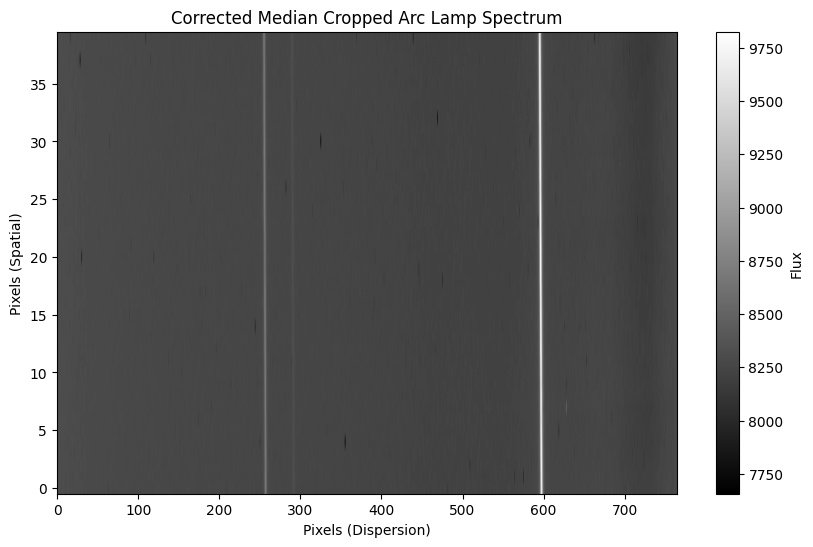

In [14]:
def correct_arc_lamp_spectrum(arc_lamp_spectrum, normalized_flat_field_from_polynomial, row_start=50, row_end=90, output_filename='corrected_median_arc_spectrum.fits'):
    """
    Correct the arc lamp spectrum by taking the median of the cropped spectra frames
    and dividing by the normalized flat field from polynomial fitting.

    :param arc_lamp_spectrum: A list containing tuples of (header, data) for the arc lamp frames.
    :type arc_lamp_spectrum: list of tuples
    :param normalized_flat_field_from_polynomial: The normalized 2D flat-field image to divide by.
    :type normalized_flat_field_from_polynomial: np.ndarray
    :param row_start: Starting row index for cropping.
    :type row_start: int
    :param row_end: Ending row index for cropping.
    :type row_end: int
    :param output_filename: Name of the output FITS file.
    :type output_filename: str
    :return: The corrected median arc lamp spectrum.
    :rtype: np.ndarray
    """
    # Extract the 'data' part from each arc lamp frame
    arc_data_list = [frame[1] for frame in arc_lamp_spectrum]
    # Crop the y-axis of each arc lamp frame
    cropped_arc_data_list = [data[row_start:row_end, :] for data in arc_data_list]
    # Compute the median of the cropped arc lamp spectra (no dark subtraction)
    median_arc_spectrum = np.median(np.stack(cropped_arc_data_list), axis=0)
    # Divide the median arc spectrum by the normalized flat field
    corrected_median_arc_spectrum = median_arc_spectrum / normalized_flat_field_from_polynomial
    
    # Save the corrected median arc spectrum to a FITS file
    hdu = fits.PrimaryHDU(corrected_median_arc_spectrum)
    hdu.writeto(output_filename, overwrite=True)
    print(f"Corrected median arc spectrum saved to {output_filename}")

    return corrected_median_arc_spectrum

# Calling the function
corrected_median_arc_image = correct_arc_lamp_spectrum(arc_lamp_spectrum, normalized_flat_field_poly)

# Optional: Plotting the corrected median arc lamp spectrum
plt.figure(figsize=(10, 6))
plt.imshow(corrected_median_arc_image, cmap='gray', origin='lower', aspect='auto')
plt.colorbar(label='Flux')
plt.title('Corrected Median Cropped Arc Lamp Spectrum')
plt.xlabel('Pixels (Dispersion)')
plt.ylabel('Pixels (Spatial)')
plt.grid(False)
plt.show()

##### Section 1.4: Wavelength calibration

In [34]:
def extract_target_sky_flux(corrected_image, star_index):
    """
    Extract the target and sky flux from the corrected spectra image and compute the 1D spectrum.

    :param corrected_image: The corrected and cropped science image.
    :type corrected_image: np.ndarray
    :param star_index: Index of the star to extract target and sky flux for.
    :type star_index: int
    :return: The 1D object flux and sky flux.
    :rtype: tuple of np.ndarray
    """
    # Define row ranges for target and sky extraction
    row_ranges = { 
        0: {'target': (45, 55), 'sky': (60, 65)},   # Star 1
        1: {'target': (50, 80), 'sky': (85, 90)},   # Star 2
        2: {'target': (40, 68), 'sky': (70, 75)},   # Star 3
        3: {'target': (45, 55), 'sky': (60, 65)},   # Star 4
        4: {'target': (46, 56), 'sky': (60, 65)},   # Star 5
        5: {'target': (45, 60), 'sky': (65, 70)},   # Star 6
        6: {'target': (35, 68), 'sky': (70, 75)}    # Star 7
    }

    # Get the row ranges for the specified star
    target_rows = row_ranges[star_index]['target']
    sky_rows = row_ranges[star_index]['sky']
    
    # Crop target and sky regions using the new row_start and row_end variables
    target_region = corrected_image[target_rows[0]:target_rows[1], :]
    sky_region = corrected_image[sky_rows[0]:sky_rows[1], :]
    
    # Sum the flux in the target and sky regions along the spatial axis (rows)
    target_flux = np.sum(target_region, axis=0)
    sky_flux = np.mean(sky_region, axis=0)  # Average sky background across rows
    
    # Subtract sky background from target flux
    object_flux = target_flux - sky_flux
    
    return object_flux, sky_flux

In [16]:
def calculate_poisson_uncertainties(object_flux, sky_flux):
    """
    Calculate Poisson uncertainties for the object flux using scipy.stats.poisson.

    :param object_flux: The 1D array of object flux.
    :type object_flux: np.ndarray
    :param sky_flux: The 1D array of sky flux.
    :type sky_flux: np.ndarray
    :return: The 1D array of Poisson uncertainties.
    :rtype: np.ndarray
    """
    # Poisson uncertainties directly from the object and sky flux
    object_poisson = np.sqrt(np.clip(object_flux, 0, None))  # Poisson uncertainty for object flux
    sky_poisson = np.sqrt(np.clip(sky_flux, 0, None))        # Poisson uncertainty for sky flux
    # Total uncertainty from object and sky Poisson distributions
    total_uncertainties = np.sqrt(object_poisson**2 + sky_poisson**2)
    
    return total_uncertainties

# Process each star's corrected spectra image individually
for i, corrected_image in enumerate(corrected_spectra_images):
    object_flux, sky_flux = extract_target_sky_flux(corrected_image)
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)

    # Plotting the object flux and its uncertainties for each star
    # plt.figure(figsize=(10, 6))
    # plt.errorbar(np.arange(len(object_flux)), object_flux, yerr=poisson_uncertainties, fmt='-', 
                 # label=f'Star {i+1}: Object Flux with Poisson Uncertainty', 
                 # ecolor='lightgray', elinewidth=1, capsize=3)  # Optional: Customize error bars
    # plt.xlabel('Pixel (Dispersion Axis)')
    # plt.ylabel('Intensity (Counts)')
    # plt.title(f'1D Spectrum of Target for Star {i+1} with Poisson Uncertainties')
    # plt.legend()
    # plt.grid(True)
    # plt.savefig(f'star_{i+1}_spectrum.png')  # Save each plot as an image file
    # plt.show()

C:\Users\misha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\misha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


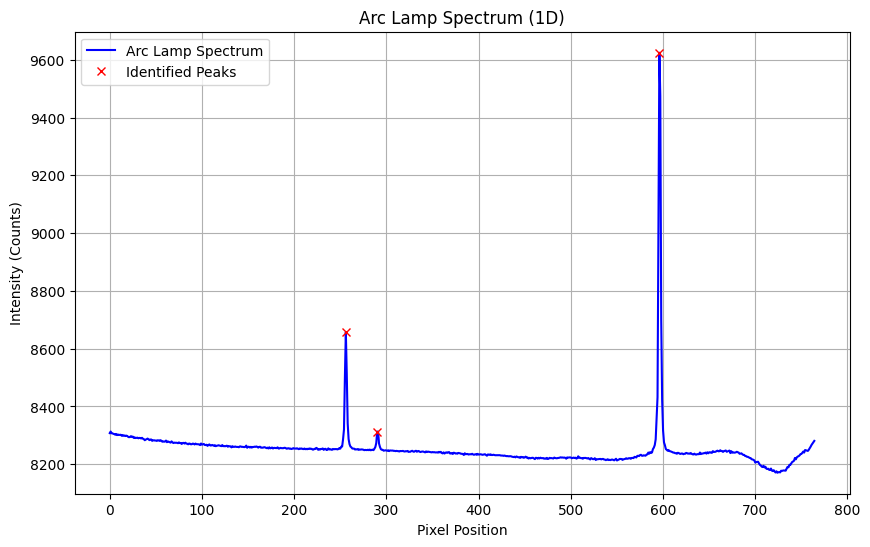

In [17]:
def analyze_arc_lamp_spectrum(corrected_median_arc_image, height_threshold=112, prominence_threshold=20):
    """
    Analyze the corrected arc lamp spectrum by collapsing it to 1D,
    identifying peaks based on height and prominence, and plotting the resulting spectrum.

    :param corrected_median_arc_image: 2D array containing the corrected arc lamp spectrum.
    :type corrected_median_arc_image: np.ndarray
    :param height_threshold: The height threshold for identifying peaks in the spectrum (default is 112).
    :type height_threshold: int, optional
    :param prominence_threshold: The minimum prominence for peaks (default is 20: DON'T CHANGE THIS).
    :type prominence_threshold: int, optional
    :return: 1D array of the arc lamp spectrum and indices of identified peaks.
    :rtype: tuple(np.ndarray, np.ndarray)
    """
    # Collapse the 2D arc lamp spectrum to 1D by taking the median along the spatial axis
    arc_lamp_spectrum_1d = np.median(corrected_median_arc_image, axis=0)
    # Identify peaks in the arc lamp spectrum using specified thresholds
    peak_indices, properties = find_peaks(arc_lamp_spectrum_1d, height=height_threshold, prominence=prominence_threshold)
    
    # Plot the arc lamp spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(arc_lamp_spectrum_1d, label='Arc Lamp Spectrum', color='blue')
    plt.plot(peak_indices, arc_lamp_spectrum_1d[peak_indices], 'rx', label='Identified Peaks')
    # Customize plot appearance
    plt.title('Arc Lamp Spectrum (1D)')
    plt.xlabel('Pixel Position')
    plt.ylabel('Intensity (Counts)')
    plt.legend()
    plt.grid()
    plt.show()

    return arc_lamp_spectrum_1d, peak_indices

# Calling the function
arc_lamp_spectrum_1d, peak_indices = analyze_arc_lamp_spectrum(corrected_median_arc_image)

In [18]:
def print_peak_positions_with_intensities(arc_lamp_spectrum_1d, peak_indices):
    """
    Retrieve the pixel positions and corresponding intensities of the identified peaks in the 
    arc lamp spectrum.

    :param arc_lamp_spectrum_1d: 1D array containing the arc lamp spectrum.
    :type arc_lamp_spectrum_1d: np.ndarray
    :param peak_indices: 1D array containing the indices of the identified peaks.
    :type peak_indices: np.ndarray
    :return: A tuple of the peak pixel indices and corresponding intensities.
    :rtype: tuple(np.ndarray, np.ndarray)
    """
    # Extract the peak intensities at the identified peak indices
    peak_intensities = arc_lamp_spectrum_1d[peak_indices]
    return peak_indices, peak_intensities

# Calling the function
peak_indices, peak_intensities = print_peak_positions_with_intensities(arc_lamp_spectrum_1d, peak_indices)

# Displaying the results
for idx, intensity in zip(peak_indices, peak_intensities):
    print(f"Peak at pixel {idx}: Intensity = {intensity}")

Peak at pixel 256: Intensity = 8657.94791435945
Peak at pixel 290: Intensity = 8312.983308259725
Peak at pixel 596: Intensity = 9624.305219313537


Pixel Position | Wavelength (nm)
------------------------------
            256 |          404.77
            290 |          407.90
            596 |          435.95


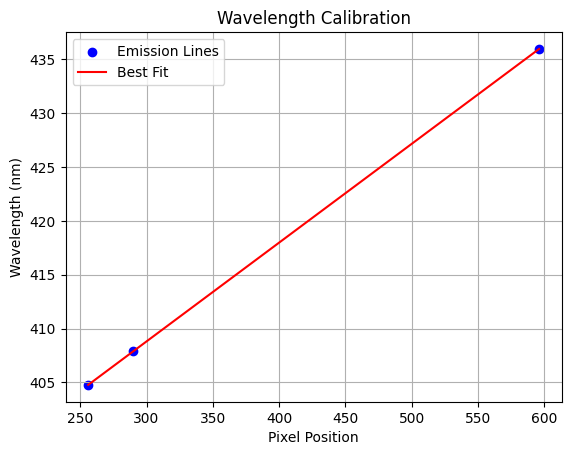

Linear Coefficients: Slope = 0.0917083063994823 nm, Intercept = 381.2973713639303 nm


In [19]:
def fit_wavelengths_to_peaks(peak_indices):
    """
    Fit the identified peak indices to known wavelengths, outputs table of pixel positions 
    and their wavelengths, and generates a calibration graph, returning the model coefficients.
    
    :param peak_indices: 1D array containing the indices of the identified peaks in the spectrum.
    :type peak_indices: np.ndarray
    :return: A tuple containing the coefficients of the linear fit (slope, intercept).
    :rtype: tuple(float, float)
    """
    # Known wavelengths corresponding to the identified peaks in nanometers
    known_wavelengths = [404.77, 407.898, 435.955]
    # Ensure the number of peaks matches the number of known wavelengths
    if len(peak_indices) != len(known_wavelengths):
        raise ValueError("Number of identified peaks does not match the number of known wavelengths.")
    # Fit a linear model to the data
    linear_model = models.Linear1D()
    fitter = fitting.LinearLSQFitter()
    # Perform the fitting
    best_fit = fitter(linear_model, peak_indices, known_wavelengths)
    # Generate the table of pixel positions and wavelengths
    print("Pixel Position | Wavelength (nm)")
    print("-" * 30)
    for pixel_position, wavelength in zip(peak_indices, known_wavelengths):
        print(f"{pixel_position:15d} | {wavelength:15.2f}")

    # Plot the data and the best-fit linear line
    plt.scatter(peak_indices, known_wavelengths, color='blue', label='Emission Lines')
    plt.plot(np.sort(peak_indices), best_fit(np.sort(peak_indices)), color='red', label='Best Fit')
    plt.xlabel('Pixel Position')
    plt.ylabel('Wavelength (nm)')
    plt.title('Wavelength Calibration')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Output the linear coefficients
    coefficients = (best_fit.slope.value, best_fit.intercept.value)
    print(f"Linear Coefficients: Slope = {coefficients[0]} nm, Intercept = {coefficients[1]} nm")
    
    return coefficients

# Calling the function 
coefficients = fit_wavelengths_to_peaks(peak_indices)

In [20]:
def convert_dispersion_to_nanometers(object_flux, coefficients):
    """
    Convert the x-axis of the object flux from counts to nanometers.

    :param object_flux: 1D array containing the object flux (in intensity/counts).
    :type object_flux: np.ndarray
    :param coefficients: Coefficients of the linear fit for the conversion to nanometers.
    :type coefficients: tuple
    :return: wavelengths in nanometers and the converted object flux.
    :rtype: tuple (np.ndarray, np.ndarray)
    """
    # Extract linear coefficients: slope (a) and intercept (b)
    slope, intercept = coefficients  
    # Convert pixel positions to wavelengths (nanometers) using the linear fit
    pixel_positions = np.arange(len(object_flux))
    wavelengths = (slope * pixel_positions) + intercept

    return wavelengths, object_flux

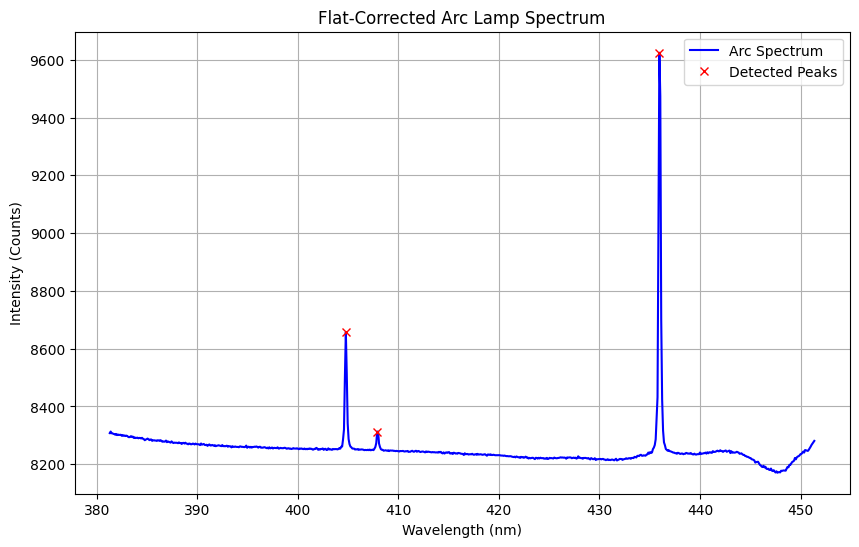

In [21]:
def process_arc_lamp_spectrum(arc_lamp_spectrum_1d, coefficients, peak_indices):
    """
    Process the arc lamp spectrum by converting to wavelengths and plotting the results.

    :param arc_lamp_spectrum_1d: 1D array containing the arc lamp spectrum (in intensity/counts).
    :type arc_lamp_spectrum_1d: np.ndarray
    :param coefficients: Coefficients of the linear fit for the conversion to nanometers.
    :type coefficients: tuple
    :param peak_indices: Indices of the identified peaks in the spectrum.
    :type peak_indices: np.ndarray
    """
    # Convert the spectrum to wavelengths
    wavelengths, converted_spectrum = convert_dispersion_to_nanometers(arc_lamp_spectrum_1d, coefficients)
    # Plot the flat-corrected arc spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, converted_spectrum, label='Arc Spectrum', color='blue')
    # Mark the peaks with an 'x' symbol
    plt.plot(wavelengths[peak_indices], converted_spectrum[peak_indices], 'x', color='red', label="Detected Peaks")
    # Set plot titles and labels
    plt.title('Flat-Corrected Arc Lamp Spectrum')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (Counts)')
    plt.legend()
    plt.grid()
    plt.show()

# Calling the functions 
process_arc_lamp_spectrum(arc_lamp_spectrum_1d, coefficients, peak_indices)
# The peaks aren't equal to [365.02, 404.66, 435.83] expected values but rather [381.007, 386.84, 437.665]

In [22]:
def process_star_spectra(corrected_spectra_images, coefficients):
    """
    Process each star's corrected spectra image, calculate flux and uncertainties,
    convert to wavelengths, and save plots.

    :param corrected_spectra_images: List of corrected spectra images for stars.
    :type corrected_spectra_images: list of np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    """
    for i, corrected_image in enumerate(corrected_spectra_images):
        # Extract object and sky flux
        object_flux, sky_flux = extract_target_sky_flux(corrected_image)
        # Calculate Poisson uncertainties
        poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
        # Convert to wavelengths (nm)
        wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)

        # Plotting the object flux and its uncertainties for each star
        plt.figure(figsize=(10, 6))
        plt.errorbar(wavelengths, converted_object_flux, yerr=poisson_uncertainties, fmt='-', 
                     label=f'Star {i+1}: Object Flux with Poisson Uncertainty', 
                     ecolor='lightgray', elinewidth=1, capsize=3)  
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Intensity (Counts)')
        plt.title(f'1D Spectrum of Target for Star {i+1} with Poisson Uncertainties')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'star_{i+1}_spectrum_nanometers.png')  
        plt.close() 

# Calling the function
process_star_spectra(corrected_spectra_images, coefficients)

C:\Users\misha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


##### Section 2.1: Flux calibration

In [23]:
def process_star_spectra_Vega_Peaks_fit(corrected_spectra_images, coefficients):
    """
    Process the corrected spectra image of the first star, calculate flux and uncertainties,
    convert to wavelengths, and save plots. Returns the converted object flux for further analysis.

    :param corrected_spectra_images: List of corrected spectra images for stars.
    :type corrected_spectra_images: list of np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :return: Wavelengths and converted object flux of the reference star.
    :rtype: tuple(np.ndarray, np.ndarray)
    """
    # Process only the first star's corrected spectra image
    corrected_image = corrected_spectra_images[0]
    # Extract object and sky flux
    object_flux, sky_flux = extract_target_sky_flux(corrected_image)
    # Calculate Poisson uncertainties
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
    # Convert to wavelengths (nm)
    wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
    # Identify peaks in the original spectrum
    peak_indices, _ = find_peaks(converted_object_flux, prominence=10)  # Adjust prominence as needed
    peak_wavelengths = wavelengths[peak_indices]
    peak_fluxes = converted_object_flux[peak_indices]
    # Fit a polynomial to connect most of the peaks
    polynomial_degree = min(6, len(peak_wavelengths) - 1)  # Ensure polynomial degree is suitable for number of peaks
    polynomial_fit = Polynomial.fit(peak_wavelengths, peak_fluxes, deg=polynomial_degree)
    fit_values = polynomial_fit(wavelengths)
    # Plot both the original curve and the polynomial fit for Star 1
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, converted_object_flux, label='Original Spectrum for Star 1', color='blue')
    plt.plot(wavelengths, fit_values, label=f'{polynomial_degree}-Order Polynomial Fit (Connecting Peaks)', color='red')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (Counts)')
    plt.title('Original Spectrum and Polynomial Fit for Star 1 (Vega, class A)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: Only polynomial fit
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, fit_values, label=f'{polynomial_degree}-Order Polynomial Fit', color='red')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Fitted Intensity (Counts)')
    plt.title(f'Polynomial Fit (Degree {polynomial_degree}) for Star 1')
    plt.legend()
    plt.grid(True)
    plt.show()

    return wavelengths, fit_values

# Call the function to get wavelengths and flux for the reference star
wavelengths, fit_values = process_star_spectra_Vega_Peaks_fit(corrected_spectra_images, coefficients)

ValueError: Coefficient array is empty

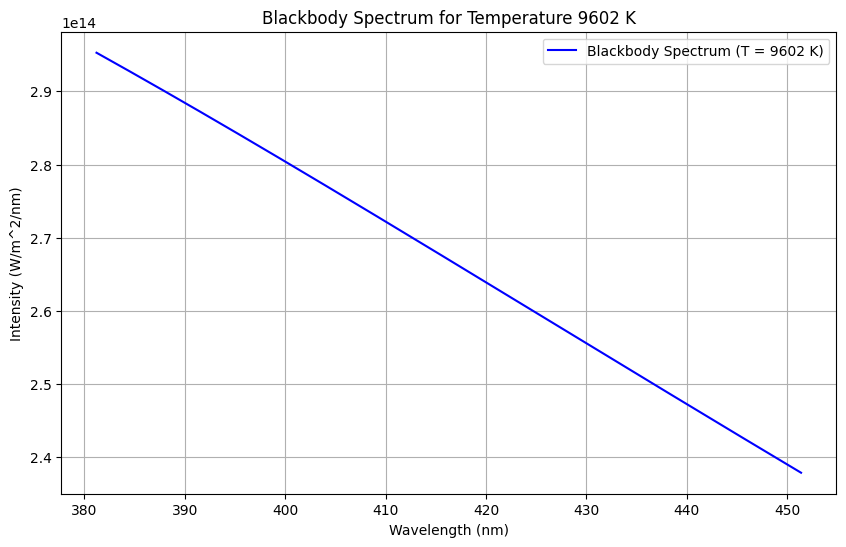

In [24]:
def calculate_blackbody_spectrum(wavelengths, temperature, h=6.626e-34, c=3.0e8, k=1.38e-23):
    """
    Calculate and optionally plot the blackbody spectrum for a given temperature.

    :param wavelengths: Wavelengths in nm for which to calculate the spectrum.
    :type wavelengths: np.ndarray
    :param temperature: Temperature of the blackbody in Kelvin.
    :type temperature: float
    :param h: Planck's constant in J·s (default: 6.626e-34).
    :type h: float
    :param c: Speed of light in m/s (default: 3.0e8).
    :type c: float
    :param k: Boltzmann constant in J/K (default: 1.38e-23).
    :type k: float
    :return: Blackbody spectrum.
    :rtype: np.ndarray
    """
    # Convert wavelengths from nm to meters for the calculation
    wavelengths_m = wavelengths * 1e-9
    # Calculate the blackbody radiation using Planck's law
    term1 = (2.0 * h * c**2) / (wavelengths_m**5)
    term2 = 1.0 / (np.exp((h * c) / (wavelengths_m * k * temperature)) - 1.0)
    blackbody_spectrum = term1 * term2
    # Plot the blackbody spectrum if plot=True
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, blackbody_spectrum, label=f'Blackbody Spectrum (T = {temperature} K)', color='blue')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (W/m^2/nm)')
    plt.title(f'Blackbody Spectrum for Temperature {temperature} K')
    plt.legend()
    plt.grid(True)
    plt.show()

    return blackbody_spectrum

# Example usage
temperature = 9602  # Temperature in Kelvin
blackbody_spectrum = calculate_blackbody_spectrum(wavelengths, temperature)

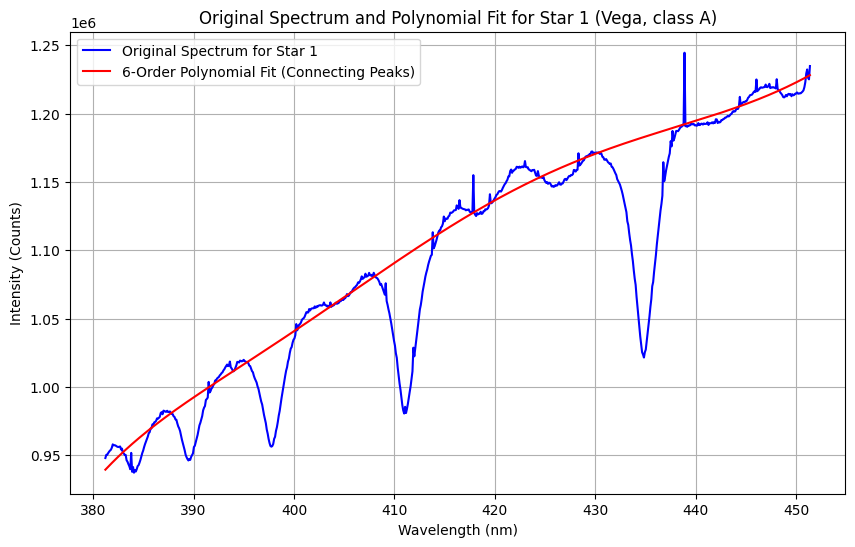

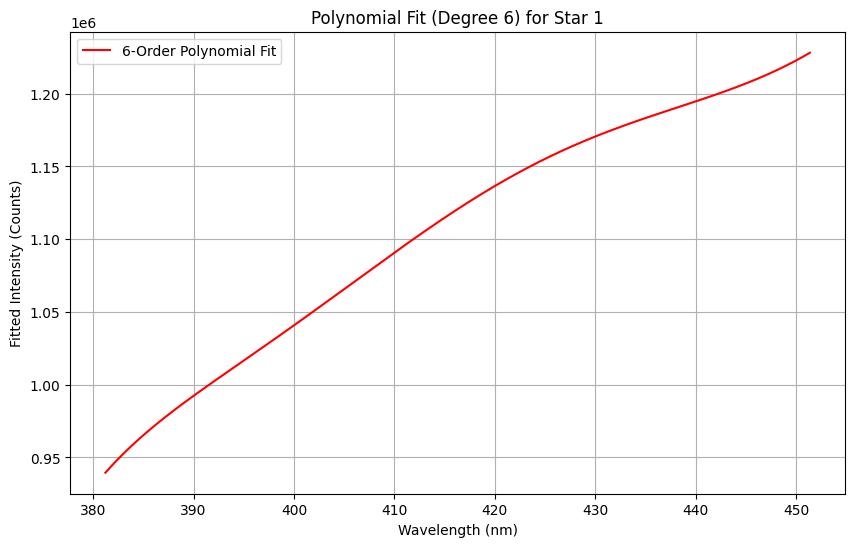

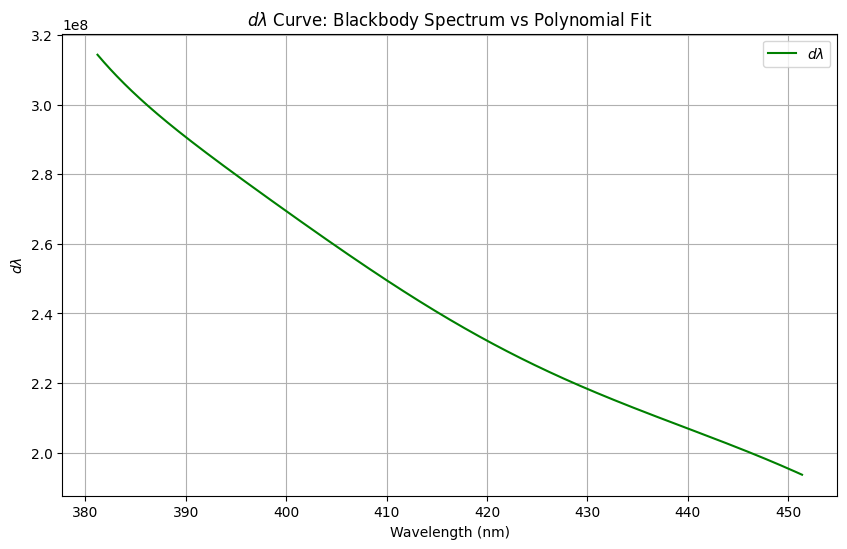

In [25]:
def calculate_d_lambda_combined_no_curve(wavelengths, temperature, corrected_spectra_images, coefficients):
    """
    Calculate the d_lambda curve by dividing the blackbody spectrum by the polynomial fit of the spectrum
    and plot the resulting d_lambda values against the wavelengths.

    :param wavelengths: Wavelengths in nm for which to calculate the spectrum.
    :type wavelengths: np.ndarray
    :param temperature: Temperature of the blackbody in Kelvin.
    :type temperature: float
    :param corrected_spectra_images: List of corrected spectra images for stars.
    :type corrected_spectra_images: list of np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :return: Wavelengths and corresponding d_lambda values.
    :rtype: tuple(np.ndarray, np.ndarray)
    """
    # Step 2: Get the polynomial fit values using the process_star_spectra_Vega_Peaks_fit function
    wavelengths_fit, polynomial_fit_values = process_star_spectra_Vega_Peaks_fit(corrected_spectra_images, coefficients)
    # Step 3: Interpolate the polynomial fit values to match the blackbody spectrum wavelengths
    interpolation_function = interp1d(wavelengths_fit, polynomial_fit_values, kind='linear', fill_value="extrapolate")
    interpolated_fit_values = interpolation_function(wavelengths)
    # Step 4: Calculate d_lambda by dividing the blackbody flux by the interpolated polynomial fit values
    d_lambda = blackbody_spectrum / interpolated_fit_values

    # Step 5: Plot d_lambda as a function of wavelength
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, d_lambda, label=r'$d\lambda$', color='green')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel(r'$d\lambda$')
    plt.title(r'$d\lambda$ Curve: Blackbody Spectrum vs Polynomial Fit')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Return wavelengths and the calculated d_lambda values
    return wavelengths, d_lambda

# Calling the function
temperature = 9602
wavelengths_result, d_lambda = calculate_d_lambda_combined_no_curve(wavelengths, temperature, corrected_spectra_images, coefficients)

##### 2.2 Calibrate the fluxes of the stars

In [26]:
def process_all_spectra(corrected_spectra_images, coefficients, d_lambda):
    """
    Process each star's corrected spectra image, calculate flux and uncertainties,
    convert to wavelengths, apply d_lambda, and save plots.

    :param corrected_spectra_images: List of corrected spectra images for stars.
    :type corrected_spectra_images: list of np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :param d_lambda_wavelengths: Wavelengths for which d_lambda is defined.
    :type d_lambda_wavelengths: np.ndarray
    :param d_lambda: The d_lambda values.
    :type d_lambda: np.ndarray
    :return: List of tuples containing wavelengths and calibrated object flux for each star.
    :rtype: list of tuple(np.ndarray, np.ndarray)
    """

    calibrated_spectra = []

    # Define star spectral classes and colors for plotting
    star_classes = ['A', 'M', 'F', 'B', 'K', 'G', 'O']
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    
    for i, corrected_image in enumerate(corrected_spectra_images):
        # Extract object and sky flux for each star's spectrum
        object_flux, sky_flux = extract_target_sky_flux(corrected_image)
        
        # Calculate Poisson uncertainties for the object flux
        poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
        
        # Convert pixel positions to wavelengths (nm) using the provided coefficients
        wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
                
        # Multiply the object flux by d_lambda for calibration
        calibrated_object_flux = converted_object_flux * d_lambda
        
        # Store the calibrated wavelengths and flux for later use
        calibrated_spectra.append((wavelengths, calibrated_object_flux))

        # Plot the calibrated object flux with uncertainties
        plt.figure(figsize=(10, 6))
        plt.errorbar(wavelengths, calibrated_object_flux, yerr=poisson_uncertainties, fmt='-', 
                     label=f'Star {i+1} (class {star_classes[i]}): Calibrated Object Flux with Poisson Uncertainty', 
                     color=f'{colors[i]}', ecolor='lightgray', elinewidth=1, capsize=3)
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Calibrated Intensity (Counts)')
        plt.title(f'Calibrated 1D Spectrum for Star {i+1} (class {star_classes[i]}) with Poisson Uncertainties')
        plt.legend()
        plt.grid(True)
        
        # Save the plot as a PNG file
        plt.savefig(f'calibrated_star_{i + 1}.png')
        plt.close()

    return calibrated_spectra

# Example usage
# Assuming d_lambda_wavelengths and d_lambda are already calculated or available
calibrated_spectra = process_all_spectra(corrected_spectra_images, coefficients, d_lambda)

##### 3.1: Strengths of the specified absorption lines

##### First Star (A): Vega

In [27]:
def process_first_star(corrected_spectrum_image, coefficients, d_lambda):
    """
    Process the corrected spectrum image for the first star, calculate flux and uncertainties,
    convert to wavelengths, apply d_lambda, and save plot with identified dips.

    :param corrected_spectrum_image: Corrected spectrum image for the first star.
    :type corrected_spectrum_image: np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :param d_lambda: The d_lambda values.
    :type d_lambda: np.ndarray
    :return: Tuple containing wavelengths, calibrated object flux, and list of identified dips (wavelength, flux).
    :rtype: tuple(np.ndarray, np.ndarray, list(tuple(float, float)))
    """

    # Convert key lines from angstroms to nanometers
    absorption_lines = {
       "dip 1": (340, 345),
       "dip 2": (350, 360), 
       "dip 3": (360, 380), 
       "dip 4": (380, 400),
       "dip 5": (400, 460)
    }

    # Extract object and sky flux for the first star's spectrum
    object_flux, sky_flux = extract_target_sky_flux(corrected_spectrum_image)
    # Calculate Poisson uncertainties for the object flux
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
    # Convert pixel positions to wavelengths (nm) using the provided coefficients
    wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
    # Multiply the object flux by d_lambda for calibration
    calibrated_object_flux = converted_object_flux * d_lambda
    # Store the calibrated wavelengths and flux
    calibrated_spectra = (wavelengths, calibrated_object_flux)
    # List to store identified dips (wavelength, flux)
    identified_dips = []
    # Plot the calibrated object flux with uncertainties
    plt.figure(figsize=(10, 6))
    plt.errorbar(wavelengths, calibrated_object_flux, yerr=poisson_uncertainties, fmt='-', 
                 label=f'Star 1: Calibrated Object Flux with Poisson Uncertainty', 
                 color='blue', ecolor='lightgray', elinewidth=1, capsize=3)

    # Identify and plot the lowest point for each specified range
    for line, (start, end) in absorption_lines.items():
        # Get the indices within the wavelength range
        indices_in_range = np.where((wavelengths >= start) & (wavelengths <= end))[0]
        if len(indices_in_range) > 0:
            # Find the lowest point within the range (minimum flux)
            min_index_in_range = np.argmin(calibrated_object_flux[indices_in_range])
            # Get the corresponding wavelength and flux for the minimum
            min_wavelength = wavelengths[indices_in_range][min_index_in_range]
            min_flux = calibrated_object_flux[indices_in_range][min_index_in_range]
            # Add the identified dip to the list
            identified_dips.append((min_wavelength, min_flux))
            # Plot the lowest point within the range
            plt.scatter(min_wavelength, min_flux, color='red', marker='x', 
                        label=f'Lowest Point in Range ({line})')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Calibrated Intensity (Counts)')
    plt.title(f'Calibrated 1D Spectrum for Star 1 with Identified Lowest Points')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig(f'calibrated_star_1_lowest_points.png')
    plt.close()

    return calibrated_spectra, identified_dips

# Example usage for the first star
# Assuming d_lambda_wavelengths and d_lambda are already calculated or available
calibrated_spectrum_first_star, dip_points = process_first_star(corrected_spectra_images[0], coefficients, d_lambda)

# Output the identified dip points
for i, (wavelength, flux) in enumerate(dip_points, 1):
    print(f"Dip {i}: Wavelength = {wavelength:.2f} nm, Flux = {flux:.2f}")

Dip 1: Wavelength = 397.84 nm, Flux = 262040289957922.91
Dip 2: Wavelength = 434.85 nm, Flux = 217228083414117.22


In [28]:
def gaussian(x, a, x0, sigma):
    """
    Define a Gaussian function.
    
    :param x: Independent variable (wavelengths).
    :type x: np.ndarray
    :param a: Amplitude of the Gaussian.
    :type a: float
    :param x0: Center of the Gaussian (peak position).
    :type x0: float
    :param sigma: Standard deviation (width) of the Gaussian.
    :type sigma: float
    :return: Gaussian function evaluated at x.
    :rtype: np.ndarray
    """
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

In [29]:
def normalize_spectrum_to_continuum(wavelengths, flux, degree=2, dip_points=None):
    """
    Normalize the spectrum to its continuum by fitting a polynomial.
    
    :param wavelengths: Wavelengths in nm.
    :type wavelengths: np.ndarray
    :param flux: The flux values (counts).
    :type flux: np.ndarray
    :param degree: Degree of the polynomial to fit the continuum.
    :type degree: int
    :param dip_points: List of identified dips (wavelength, flux).
    :type dip_points: list
    :return: Normalized flux (continuum normalized to 1).
    :rtype: np.ndarray
    """
    mask = np.ones_like(wavelengths, dtype=bool)
    if dip_points:
        for wavelength, _ in dip_points:
            # Masking a small range around the identified dip points
            mask &= ~((wavelengths >= wavelength - 5) & (wavelengths <= wavelength + 5))
    # Fit polynomial to the continuum
    polynomial_coefficients = np.polyfit(wavelengths[mask], flux[mask], degree)
    continuum = np.polyval(polynomial_coefficients, wavelengths)
    # Normalize the flux by the continuum
    normalized_flux = flux / continuum

    return normalized_flux

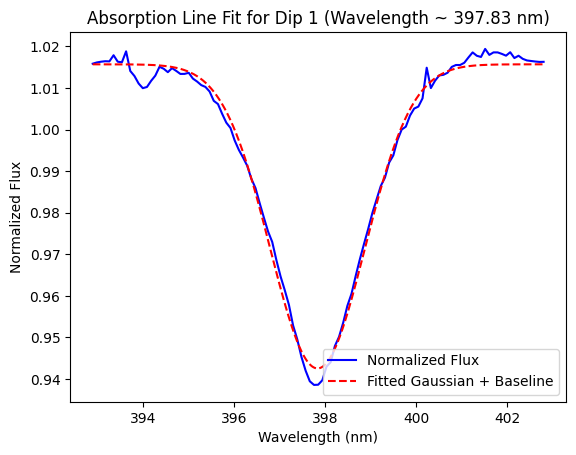

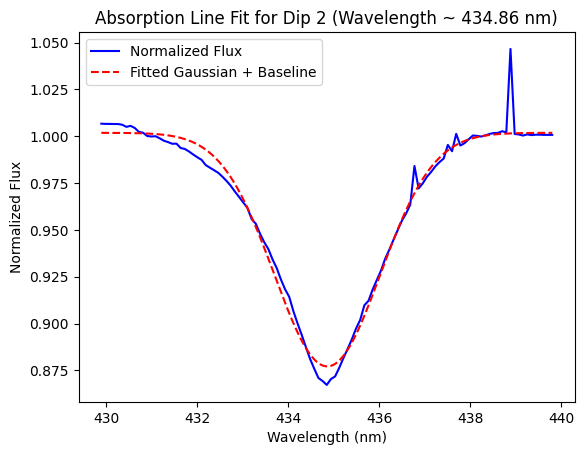

Dip 1:
  Center Wavelength (nm): 397.83
  Amplitude: -0.07
  Sigma (nm): 1.04
  Equivalent Width (nm): 0.1907

Dip 2:
  Center Wavelength (nm): 434.86
  Amplitude: -0.12
  Sigma (nm): 1.17
  Equivalent Width (nm): 0.3641



In [30]:
def measure_absorption_lines(wavelengths, normalized_flux, dip_points):
    """
    Measure the absorption lines by fitting a Gaussian + Constant to each identified dip.
    Also plots the normalized flux and the fitted Gaussian for each dip.
    
    :param wavelengths: Wavelengths in nm.
    :type wavelengths: np.ndarray
    :param normalized_flux: Normalized flux values (continuum = 1).
    :type normalized_flux: np.ndarray
    :param dip_points: List of identified dips (wavelength, flux).
    :type dip_points: list
    :return: Dictionary with equivalent widths and Gaussian fit parameters for each line.
    :rtype: dict
    """
    line_measurements = {}
    for i, (wavelength, _) in enumerate(dip_points, 1):
        # Define a range around the dip point (±5 nm for wider region)
        start, end = wavelength - 5, wavelength + 5
        indices_in_range = np.where((wavelengths >= start) & (wavelengths <= end))[0]
        if len(indices_in_range) > 0:
            # Extract the relevant part of the spectrum for the absorption line
            line_wavelengths = wavelengths[indices_in_range]
            line_flux = normalized_flux[indices_in_range]
            # Split the region for continuum estimation (using edges for baseline)
            y1s = line_flux[:5]   # Left edge of the region
            y2s = line_flux[-5:]  # Right edge of the region
            # Set thresholds for the edge regions to calculate the baseline
            for j in range(len(y1s)):
                if y1s[j] >= 0.25 * np.max(line_flux):
                    y1s[j] = np.mean(y1s)
                if y2s[j] >= 0.25 * np.max(line_flux):
                    y2s[j] = np.mean(y2s)
            # Combine the baseline regions and the center flux values
            line_flux_smoothed = np.hstack((y1s, line_flux[5:-5], y2s))
            # Initial guess for the Gaussian parameters
            amp_guess = np.max(line_flux_smoothed)
            mu_guess = np.median(line_wavelengths)
            # Define the model: Gaussian + Constant
            g_init = models.Gaussian1D(amplitude=amp_guess, mean=mu_guess) + models.Const1D()
            # Fit the model to the data
            fitter = fitting.LevMarLSQFitter()
            g_fit = fitter(g_init, line_wavelengths, line_flux_smoothed)
            # Extract the fitted parameters
            amp, mean, stddev, const = g_fit.parameters
            # Calculate the equivalent width: area under the Gaussian
            equivalent_width = np.abs(amp * stddev * np.sqrt(2 * np.pi))
            # Store results for this line
            line_measurements[f"Dip {i}"] = {
                "amplitude": amp,
                "center_wavelength": mean,
                "sigma": stddev,
                "equivalent_width": equivalent_width,
                "baseline": const
            }

            # Plot the data and the Gaussian fit
            x_values = np.linspace(line_wavelengths[0], line_wavelengths[-1], 1000)
            y_values = g_fit(x_values)
            plt.figure()
            plt.plot(line_wavelengths, line_flux, 'b-', label='Normalized Flux')
            plt.plot(x_values, y_values, 'r--', label='Fitted Gaussian + Baseline')
            plt.title(f"Absorption Line Fit for Dip {i} (Wavelength ~ {mean:.2f} nm)")
            plt.xlabel("Wavelength (nm)")
            plt.ylabel("Normalized Flux")
            plt.legend()
            plt.show()

    return line_measurements

# Extract object and sky flux for the first star's spectrum
object_flux, sky_flux = extract_target_sky_flux(corrected_spectra_images[0])
# Convert pixel positions to wavelengths (nm) using the provided coefficients
wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
# Multiply the object flux by d_lambda for calibration
calibrated_object_flux = converted_object_flux * d_lambda
# Normalize the spectrum to its continuum using the identified dip points
normalized_flux = normalize_spectrum_to_continuum(wavelengths, calibrated_object_flux, degree=2, dip_points=dip_points)

# Measure the absorption lines around the dip points
line_measurements = measure_absorption_lines(wavelengths, normalized_flux, dip_points)

# Print out the results
for dip, measurements in line_measurements.items():
    print(f"{dip}:")
    print(f"  Center Wavelength (nm): {measurements['center_wavelength']:.2f}")
    print(f"  Amplitude: {measurements['amplitude']:.2f}")
    print(f"  Sigma (nm): {measurements['sigma']:.2f}")
    print(f"  Equivalent Width (nm): {measurements['equivalent_width']:.4f}\n")

##### Second Star (M): Bet Peg 

##### Bad data point #1

Dip 1: Wavelength = 409.96 nm, Flux = 227878608077170.66
Dip 2: Wavelength = 450.92 nm, Flux = 183441926137960.62


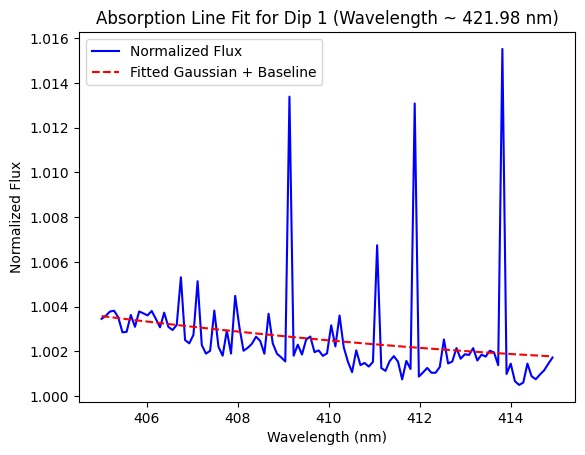

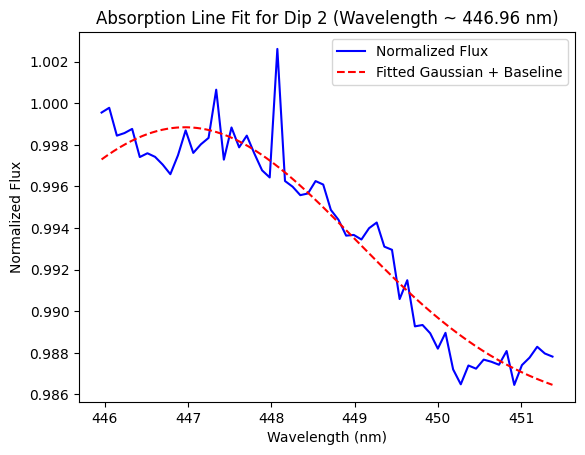

Dip 1:
  Center Wavelength (nm): 421.98
  Amplitude: -0.05
  Sigma (nm): 57.76
  Equivalent Width (nm): 7.4856

Dip 2:
  Center Wavelength (nm): 446.96
  Amplitude: 0.01
  Sigma (nm): 2.05
  Equivalent Width (nm): 0.0705



In [31]:
def process_second_star(corrected_spectrum_image, coefficients, d_lambda):
    """
    Process the corrected spectrum image for the second star, calculate flux and uncertainties,
    convert to wavelengths, apply d_lambda, and save plot with identified dips.

    :param corrected_spectrum_image: Corrected spectrum image for the second star.
    :type corrected_spectrum_image: np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :param d_lambda: The d_lambda values.
    :type d_lambda: np.ndarray
    :return: Tuple containing wavelengths, calibrated object flux, and list of identified dips (wavelength, flux).
    :rtype: tuple(np.ndarray, np.ndarray, list(tuple(float, float)))
    """

    # Define key lines for absorption dips in nanometers
    absorption_lines = {
        "dip 1": (405, 410),
        "dip 2": (445, 451)
    }

    # Extract object and sky flux for the third star's spectrum
    object_flux, sky_flux = extract_target_sky_flux(corrected_spectrum_image)
    # Calculate Poisson uncertainties for the object flux
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
    # Convert pixel positions to wavelengths (nm) using the provided coefficients
    wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
    # Multiply the object flux by d_lambda for calibration
    calibrated_object_flux = converted_object_flux * d_lambda
    # Store the calibrated wavelengths and flux
    calibrated_spectra = (wavelengths, calibrated_object_flux)
    # List to store identified dips (wavelength, flux)
    identified_dips = []

    # Plot the calibrated object flux with uncertainties
    plt.figure(figsize=(10, 6))
    plt.errorbar(wavelengths, calibrated_object_flux, yerr=poisson_uncertainties, fmt='-', 
                 label='Star 2: Calibrated Object Flux with Poisson Uncertainty', 
                 color='green', ecolor='lightgray', elinewidth=1, capsize=3)

    # Identify and plot the lowest point for each specified range
    for line, (start, end) in absorption_lines.items():
        # Get the indices within the wavelength range
        indices_in_range = np.where((wavelengths >= start) & (wavelengths <= end))[0]
        if len(indices_in_range) > 0:
            # Find the lowest point within the range (minimum flux)
            min_index_in_range = np.argmin(calibrated_object_flux[indices_in_range])
            # Get the corresponding wavelength and flux for the minimum
            min_wavelength = wavelengths[indices_in_range][min_index_in_range]
            min_flux = calibrated_object_flux[indices_in_range][min_index_in_range]
            # Add the identified dip to the list with corrected min_wavelength
            identified_dips.append((min_wavelength, min_flux))
            # Plot the lowest point within the range
            plt.scatter(min_wavelength, min_flux, color='red', marker='x', 
                        label=f'Lowest Point in Range ({line})')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Calibrated Intensity (Counts)')
    plt.title('Calibrated 1D Spectrum for Star 2 with Identified Lowest Points')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig('calibrated_star_2_lowest_points.png')
    plt.close()

    return calibrated_spectra, identified_dips

# Assuming d_lambda_wavelengths and d_lambda are already calculated or available
calibrated_spectrum_third_star, dip_points = process_second_star(corrected_spectra_images[1], coefficients, d_lambda)

# Output the identified dip points
for i, (wavelength, flux) in enumerate(dip_points, 1):
    print(f"Dip {i}: Wavelength = {wavelength:.2f} nm, Flux = {flux:.2f}")

# Extract object and sky flux for the first star's spectrum
object_flux, sky_flux = extract_target_sky_flux(corrected_spectra_images[1])
# Convert pixel positions to wavelengths (nm) using the provided coefficients
wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
# Multiply the object flux by d_lambda for calibration
calibrated_object_flux = converted_object_flux * d_lambda
# Normalize the spectrum to its continuum using the identified dip points
normalized_flux = normalize_spectrum_to_continuum(wavelengths, calibrated_object_flux, degree=2, dip_points=dip_points)
# Measure the absorption lines around the dip points
line_measurements = measure_absorption_lines(wavelengths, normalized_flux, dip_points)

# Print out the results
for dip, measurements in line_measurements.items():
    print(f"{dip}:")
    print(f"  Center Wavelength (nm): {measurements['center_wavelength']:.2f}")
    print(f"  Amplitude: {measurements['amplitude']:.2f}")
    print(f"  Sigma (nm): {measurements['sigma']:.2f}")
    print(f"  Equivalent Width (nm): {measurements['equivalent_width']:.4f}\n")

##### Third Star (F): Alt Per 

Dip 1: Wavelength = 389.95 nm, Flux = 276098541799438.34
Dip 2: Wavelength = 433.20 nm, Flux = 213816960903890.69


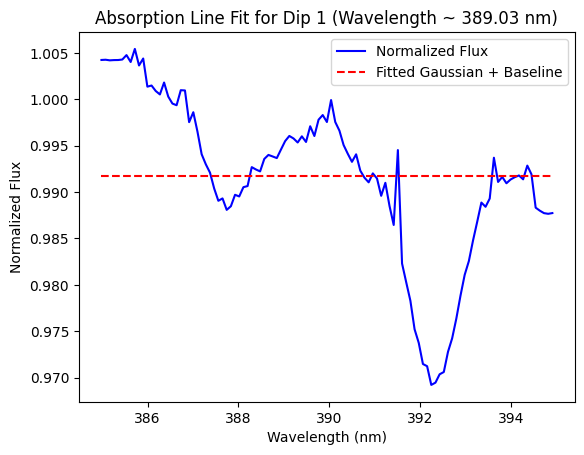

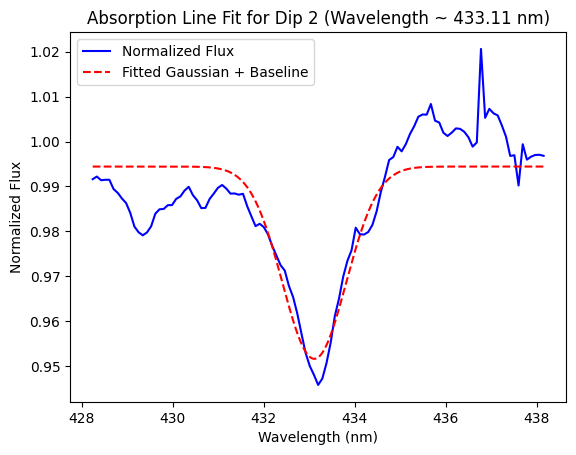

Dip 1:
  Center Wavelength (nm): 389.03
  Amplitude: 0.01
  Sigma (nm): 0.00
  Equivalent Width (nm): 0.0000

Dip 2:
  Center Wavelength (nm): 433.11
  Amplitude: -0.04
  Sigma (nm): 0.70
  Equivalent Width (nm): 0.0749



In [32]:
def process_third_star(corrected_spectrum_image, coefficients, d_lambda):
    """
    Process the corrected spectrum image for the third star, calculate flux and uncertainties,
    convert to wavelengths, apply d_lambda, and save plot with identified dips.

    :param corrected_spectrum_image: Corrected spectrum image for the third star.
    :type corrected_spectrum_image: np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :param d_lambda: The d_lambda values.
    :type d_lambda: np.ndarray
    :return: Tuple containing wavelengths, calibrated object flux, and list of identified dips (wavelength, flux).
    :rtype: tuple(np.ndarray, np.ndarray, list(tuple(float, float)))
    """

    # Define key lines for absorption dips in nanometers
    absorption_lines = {
        "dip 1": (355, 360),
        "dip 2": (360, 370),
        "dip 3": (380, 390),  
        "dip 4": (430, 435)
    }

    # Extract object and sky flux for the third star's spectrum
    object_flux, sky_flux = extract_target_sky_flux(corrected_spectrum_image)
    
    # Calculate Poisson uncertainties for the object flux
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
    
    # Convert pixel positions to wavelengths (nm) using the provided coefficients
    wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
    
    # Multiply the object flux by d_lambda for calibration
    calibrated_object_flux = converted_object_flux * d_lambda
    
    # Store the calibrated wavelengths and flux
    calibrated_spectra = (wavelengths, calibrated_object_flux)
    
    # List to store identified dips (wavelength, flux)
    identified_dips = []

    # Plot the calibrated object flux with uncertainties
    plt.figure(figsize=(10, 6))
    plt.errorbar(wavelengths, calibrated_object_flux, yerr=poisson_uncertainties, fmt='-', 
                 label='Star 3: Calibrated Object Flux with Poisson Uncertainty', 
                 color='green', ecolor='lightgray', elinewidth=1, capsize=3)

    # Identify and plot the lowest point for each specified range
    for line, (start, end) in absorption_lines.items():
        # Get the indices within the wavelength range
        indices_in_range = np.where((wavelengths >= start) & (wavelengths <= end))[0]
        if len(indices_in_range) > 0:
            # Find the lowest point within the range (minimum flux)
            min_index_in_range = np.argmin(calibrated_object_flux[indices_in_range])
            # Get the corresponding wavelength and flux for the minimum
            min_wavelength = wavelengths[indices_in_range][min_index_in_range]
            min_flux = calibrated_object_flux[indices_in_range][min_index_in_range]
            # Add the identified dip to the list with corrected min_wavelength
            identified_dips.append((min_wavelength, min_flux))
            # Plot the lowest point within the range
            plt.scatter(min_wavelength, min_flux, color='red', marker='x', 
                        label=f'Lowest Point in Range ({line})')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Calibrated Intensity (Counts)')
    plt.title('Calibrated 1D Spectrum for Star 3 with Identified Lowest Points')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig('calibrated_star_3_lowest_points.png')
    plt.close()

    return calibrated_spectra, identified_dips

# Assuming d_lambda_wavelengths and d_lambda are already calculated or available
calibrated_spectrum_third_star, dip_points = process_third_star(corrected_spectra_images[2], coefficients, d_lambda)

# Output the identified dip points
for i, (wavelength, flux) in enumerate(dip_points, 1):
    print(f"Dip {i}: Wavelength = {wavelength:.2f} nm, Flux = {flux:.2f}")

# Extract object and sky flux for the first star's spectrum
object_flux, sky_flux = extract_target_sky_flux(corrected_spectra_images[2])
# Convert pixel positions to wavelengths (nm) using the provided coefficients
wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
# Multiply the object flux by d_lambda for calibration
calibrated_object_flux = converted_object_flux * d_lambda
# Normalize the spectrum to its continuum using the identified dip points
normalized_flux = normalize_spectrum_to_continuum(wavelengths, calibrated_object_flux, degree=2, dip_points=dip_points)
# Measure the absorption lines around the dip points
line_measurements = measure_absorption_lines(wavelengths, normalized_flux, dip_points)

# Print out the results
for dip, measurements in line_measurements.items():
    print(f"{dip}:")
    print(f"  Center Wavelength (nm): {measurements['center_wavelength']:.2f}")
    print(f"  Amplitude: {measurements['amplitude']:.2f}")
    print(f"  Sigma (nm): {measurements['sigma']:.2f}")
    print(f"  Equivalent Width (nm): {measurements['equivalent_width']:.4f}\n")

##### Star 4 (B): Bet Per 

Dip 1: Wavelength = 395.00 nm, Flux = 268821506645722.59
Dip 2: Wavelength = 433.20 nm, Flux = 208108726752160.84


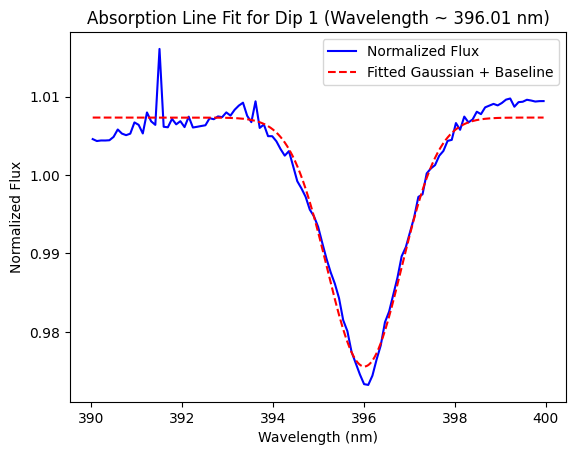

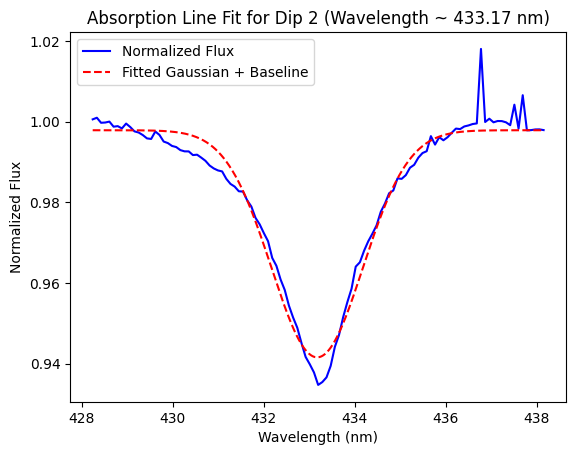

Dip 1:
  Center Wavelength (nm): 396.01
  Amplitude: -0.03
  Sigma (nm): 0.82
  Equivalent Width (nm): 0.0649

Dip 2:
  Center Wavelength (nm): 433.17
  Amplitude: -0.06
  Sigma (nm): 1.00
  Equivalent Width (nm): 0.1418



In [33]:
def process_fourth_star(corrected_spectrum_image, coefficients, d_lambda):
    """
    Process the corrected spectrum image for the fourth star, calculate flux and uncertainties,
    convert to wavelengths, apply d_lambda, and save plot with identified dips.

    :param corrected_spectrum_image: Corrected spectrum image for the fourth star.
    :type corrected_spectrum_image: np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :param d_lambda: The d_lambda values.
    :type d_lambda: np.ndarray
    :return: Tuple containing wavelengths, calibrated object flux, and list of identified dips (wavelength, flux).
    :rtype: tuple(np.ndarray, np.ndarray, list(tuple(float, float)))
    """

    # Convert key lines from angstroms to nanometers
    absorption_lines = {
       "dip 1": (335, 340),
       "dip 2": (345, 353), 
       "dip 3": (360, 370), 
       "dip 4": (390, 395), 
       "dip 5": (430, 440)
    }

    # Extract object and sky flux for the fourth star's spectrum
    object_flux, sky_flux = extract_target_sky_flux(corrected_spectrum_image)
    # Calculate Poisson uncertainties for the object flux
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
    # Convert pixel positions to wavelengths (nm) using the provided coefficients
    wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
    # Multiply the object flux by d_lambda for calibration
    calibrated_object_flux = converted_object_flux * d_lambda
    # Store the calibrated wavelengths and flux
    calibrated_spectra = (wavelengths, calibrated_object_flux)
    # List to store identified dips (wavelength, flux)
    identified_dips = []

    # Plot the calibrated object flux with uncertainties
    plt.figure(figsize=(10, 6))
    plt.errorbar(wavelengths, calibrated_object_flux, yerr=poisson_uncertainties, fmt='-', 
                 label=f'Star 4: Calibrated Object Flux with Poisson Uncertainty', 
                 color='green', ecolor='lightgray', elinewidth=1, capsize=3)
    # Identify and plot the lowest point for each specified range
    for line, (start, end) in absorption_lines.items():
        # Get the indices within the wavelength range
        indices_in_range = np.where((wavelengths >= start) & (wavelengths <= end))[0]
        if len(indices_in_range) > 0:
            # Find the lowest point within the range (minimum flux)
            min_index_in_range = np.argmin(calibrated_object_flux[indices_in_range])
            # Get the corresponding wavelength and flux for the minimum
            min_wavelength = wavelengths[indices_in_range][min_index_in_range]
            min_flux = calibrated_object_flux[indices_in_range][min_index_in_range]
            # Add the identified dip to the list
            identified_dips.append((min_wavelength, min_flux))
            # Plot the lowest point within the range
            plt.scatter(min_wavelength, min_flux, color='red', marker='x', 
                        label=f'Lowest Point in Range ({line})')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Calibrated Intensity (Counts)')
    plt.title(f'Calibrated 1D Spectrum for Star 4 with Identified Lowest Points')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig(f'calibrated_star_4_lowest_points.png')
    plt.close()

    return calibrated_spectra, identified_dips


# Assuming d_lambda_wavelengths and d_lambda are already calculated or available
calibrated_spectrum_fourth_star, dip_points = process_fourth_star(corrected_spectra_images[3], coefficients, d_lambda)

# Output the identified dip points
for i, (wavelength, flux) in enumerate(dip_points, 1):
    print(f"Dip {i}: Wavelength = {wavelength:.2f} nm, Flux = {flux:.2f}")

# Extract object and sky flux for the first star's spectrum
object_flux, sky_flux = extract_target_sky_flux(corrected_spectra_images[3])
# Convert pixel positions to wavelengths (nm) using the provided coefficients
wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
# Multiply the object flux by d_lambda for calibration
calibrated_object_flux = converted_object_flux * d_lambda
# Normalize the spectrum to its continuum using the identified dip points
normalized_flux = normalize_spectrum_to_continuum(wavelengths, calibrated_object_flux, degree=2, dip_points=dip_points)
# Measure the absorption lines around the dip points
line_measurements = measure_absorption_lines(wavelengths, normalized_flux, dip_points)

# Print out the results
for dip, measurements in line_measurements.items():
    print(f"{dip}:")
    print(f"  Center Wavelength (nm): {measurements['center_wavelength']:.2f}")
    print(f"  Amplitude: {measurements['amplitude']:.2f}")
    print(f"  Sigma (nm): {measurements['sigma']:.2f}")
    print(f"  Equivalent Width (nm): {measurements['equivalent_width']:.4f}\n")

##### Star 5 (K): Alf Cas 

##### Bad Data #2

Dip 1: Wavelength = 422.54 nm, Flux = 213096045900328.53
Dip 2: Wavelength = 437.88 nm, Flux = 198388585815226.28
Dip 3: Wavelength = 451.10 nm, Flux = 190532844660445.38


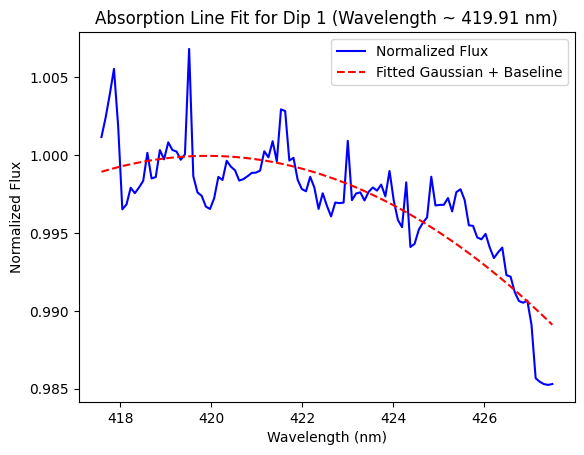

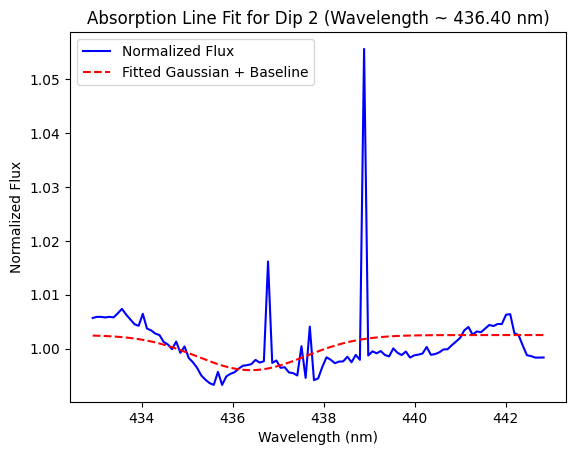

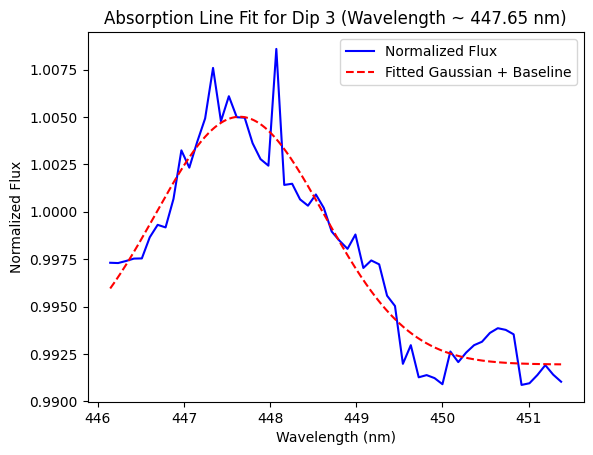

Dip 1:
  Center Wavelength (nm): 419.91
  Amplitude: 1.11
  Sigma (nm): 54.22
  Equivalent Width (nm): 151.2030

Dip 2:
  Center Wavelength (nm): 436.40
  Amplitude: -0.01
  Sigma (nm): 1.19
  Equivalent Width (nm): 0.0194

Dip 3:
  Center Wavelength (nm): 447.65
  Amplitude: 0.01
  Sigma (nm): 0.98
  Equivalent Width (nm): 0.0320



In [34]:
def process_fifth_star(corrected_spectrum_image, coefficients, d_lambda):
    """
    Process the corrected spectrum image for the fifth star, calculate flux and uncertainties,
    convert to wavelengths, apply d_lambda, and save plot with identified dips.

    :param corrected_spectrum_image: Corrected spectrum image for the sixth star.
    :type corrected_spectrum_image: np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :param d_lambda: The d_lambda values.
    :type d_lambda: np.ndarray
    :return: Tuple containing wavelengths, calibrated object flux, and list of identified dips (wavelength, flux).
    :rtype: tuple(np.ndarray, np.ndarray, list(tuple(float, float)))
    """

    # Convert key lines from angstroms to nanometers
    absorption_lines = {
       "dip 1": (360, 362), 
       "dip 2": (420, 422.6), 
       "dip 3": (435, 438), 
       "dip 4": (450, 452), 
       "dip 5": (455, 458)
    }

    # Extract object and sky flux for the sixth star's spectrum
    object_flux, sky_flux = extract_target_sky_flux(corrected_spectrum_image)
    # Calculate Poisson uncertainties for the object flux
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
    # Convert pixel positions to wavelengths (nm) using the provided coefficients
    wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
    # Multiply the object flux by d_lambda for calibration
    calibrated_object_flux = converted_object_flux * d_lambda
    # Store the calibrated wavelengths and flux
    calibrated_spectra = (wavelengths, calibrated_object_flux)
    # List to store identified dips (wavelength, flux)
    identified_dips = []

    # Plot the calibrated object flux with uncertainties
    plt.figure(figsize=(10, 6))
    plt.errorbar(wavelengths, calibrated_object_flux, yerr=poisson_uncertainties, fmt='-', 
                 label=f'Star 5: Calibrated Object Flux with Poisson Uncertainty', 
                 color='green', ecolor='lightgray', elinewidth=1, capsize=3)
    # Identify and plot the lowest point for each specified range
    for line, (start, end) in absorption_lines.items():
        # Get the indices within the wavelength range
        indices_in_range = np.where((wavelengths >= start) & (wavelengths <= end))[0]
        if len(indices_in_range) > 0:
            # Find the lowest point within the range (minimum flux)
            min_index_in_range = np.argmin(calibrated_object_flux[indices_in_range])
            # Get the corresponding wavelength and flux for the minimum
            min_wavelength = wavelengths[indices_in_range][min_index_in_range]
            min_flux = calibrated_object_flux[indices_in_range][min_index_in_range]
            # Add the identified dip to the list
            identified_dips.append((min_wavelength, min_flux))
            # Plot the lowest point within the range
            plt.scatter(min_wavelength, min_flux, color='red', marker='x', 
                        label=f'Lowest Point in Range ({line})')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Calibrated Intensity (Counts)')
    plt.title(f'Calibrated 1D Spectrum for Star 5 with Identified Lowest Points')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig(f'calibrated_star_5_lowest_points.png')
    plt.close()

    return calibrated_spectra, identified_dips


# Assuming d_lambda_wavelengths and d_lambda are already calculated or available
calibrated_spectrum_sixth_star, dip_points = process_fifth_star(corrected_spectra_images[4], coefficients, d_lambda)

# Output the identified dip points
for i, (wavelength, flux) in enumerate(dip_points, 1):
    print(f"Dip {i}: Wavelength = {wavelength:.2f} nm, Flux = {flux:.2f}")

# Extract object and sky flux for the first star's spectrum
object_flux, sky_flux = extract_target_sky_flux(corrected_spectra_images[4])
# Convert pixel positions to wavelengths (nm) using the provided coefficients
wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
# Multiply the object flux by d_lambda for calibration
calibrated_object_flux = converted_object_flux * d_lambda
# Normalize the spectrum to its continuum using the identified dip points
normalized_flux = normalize_spectrum_to_continuum(wavelengths, calibrated_object_flux, degree=2, dip_points=dip_points)
# Measure the absorption lines around the dip points
line_measurements = measure_absorption_lines(wavelengths, normalized_flux, dip_points)

# Print out the results
for dip, measurements in line_measurements.items():
    print(f"{dip}:")
    print(f"  Center Wavelength (nm): {measurements['center_wavelength']:.2f}")
    print(f"  Amplitude: {measurements['amplitude']:.2f}")
    print(f"  Sigma (nm): {measurements['sigma']:.2f}")
    print(f"  Equivalent Width (nm): {measurements['equivalent_width']:.4f}\n")

##### Star 6 (G): Alf Aur; Binary System 

Dip 1: Wavelength = 394.81 nm, Flux = 264261733375942.22
Dip 2: Wavelength = 431.91 nm, Flux = 238115831372322.84


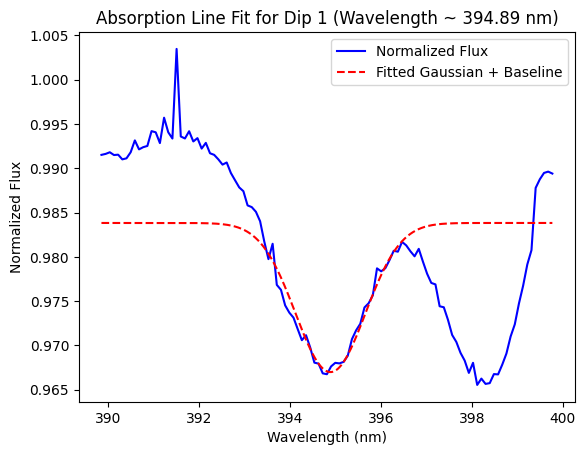

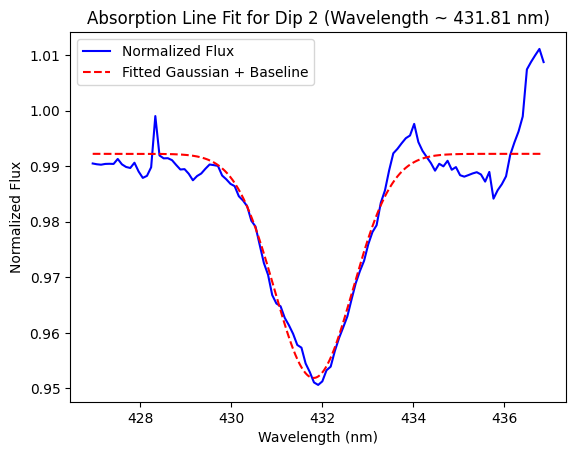

Dip 1:
  Center Wavelength (nm): 394.89
  Amplitude: -0.02
  Sigma (nm): 0.77
  Equivalent Width (nm): 0.0324

Dip 2:
  Center Wavelength (nm): 431.81
  Amplitude: -0.04
  Sigma (nm): 0.86
  Equivalent Width (nm): 0.0870



In [35]:
def process_sixth_star(corrected_spectrum_image, coefficients, d_lambda):
    """
    Process the corrected spectrum image for the sixth star, calculate flux and uncertainties,
    convert to wavelengths, apply d_lambda, and save plot with identified dips.

    :param corrected_spectrum_image: Corrected spectrum image for the sixth star.
    :type corrected_spectrum_image: np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :param d_lambda: The d_lambda values.
    :type d_lambda: np.ndarray
    :return: Tuple containing wavelengths, calibrated object flux, and list of identified dips (wavelength, flux).
    :rtype: tuple(np.ndarray, np.ndarray, list(tuple(float, float)))
    """

    # Convert key lines from angstroms to nanometers
    absorption_lines = {
       "dip 1": (360, 364),
       "dip 2": (370, 370.1), 
       "dip 3": (390, 395), 
       "dip 4": (430, 435)
    }

    # Extract object and sky flux for the sixth star's spectrum
    object_flux, sky_flux = extract_target_sky_flux(corrected_spectrum_image)
    # Calculate Poisson uncertainties for the object flux
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
    # Convert pixel positions to wavelengths (nm) using the provided coefficients
    wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
    # Multiply the object flux by d_lambda for calibration
    calibrated_object_flux = converted_object_flux * d_lambda
    # Store the calibrated wavelengths and flux
    calibrated_spectra = (wavelengths, calibrated_object_flux)
    # List to store identified dips (wavelength, flux)
    identified_dips = []

    # Plot the calibrated object flux with uncertainties
    plt.figure(figsize=(10, 6))
    plt.errorbar(wavelengths, calibrated_object_flux, yerr=poisson_uncertainties, fmt='-', 
                 label=f'Star 6: Calibrated Object Flux with Poisson Uncertainty', 
                 color='green', ecolor='lightgray', elinewidth=1, capsize=3)
    # Identify and plot the lowest point for each specified range
    for line, (start, end) in absorption_lines.items():
        # Get the indices within the wavelength range
        indices_in_range = np.where((wavelengths >= start) & (wavelengths <= end))[0]
        if len(indices_in_range) > 0:
            # Find the lowest point within the range (minimum flux)
            min_index_in_range = np.argmin(calibrated_object_flux[indices_in_range])
            # Get the corresponding wavelength and flux for the minimum
            min_wavelength = wavelengths[indices_in_range][min_index_in_range]
            min_flux = calibrated_object_flux[indices_in_range][min_index_in_range]
            # Add the identified dip to the list
            identified_dips.append((min_wavelength, min_flux))
            # Plot the lowest point within the range
            plt.scatter(min_wavelength, min_flux, color='red', marker='x', 
                        label=f'Lowest Point in Range ({line})')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Calibrated Intensity (Counts)')
    plt.title(f'Calibrated 1D Spectrum for Star 6 with Identified Lowest Points')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig(f'calibrated_star_6_lowest_points.png')
    plt.close()

    return calibrated_spectra, identified_dips


# Assuming d_lambda_wavelengths and d_lambda are already calculated or available
calibrated_spectrum_sixth_star, dip_points = process_sixth_star(corrected_spectra_images[5], coefficients, d_lambda)

# Output the identified dip points
for i, (wavelength, flux) in enumerate(dip_points, 1):
    print(f"Dip {i}: Wavelength = {wavelength:.2f} nm, Flux = {flux:.2f}")

# Extract object and sky flux for the first star's spectrum
object_flux, sky_flux = extract_target_sky_flux(corrected_spectra_images[5])
# Convert pixel positions to wavelengths (nm) using the provided coefficients
wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
# Multiply the object flux by d_lambda for calibration
calibrated_object_flux = converted_object_flux * d_lambda
# Normalize the spectrum to its continuum using the identified dip points
normalized_flux = normalize_spectrum_to_continuum(wavelengths, calibrated_object_flux, degree=2, dip_points=dip_points)
# Measure the absorption lines around the dip points
line_measurements = measure_absorption_lines(wavelengths, normalized_flux, dip_points)

# Print out the results
for dip, measurements in line_measurements.items():
    print(f"{dip}:")
    print(f"  Center Wavelength (nm): {measurements['center_wavelength']:.2f}")
    print(f"  Amplitude: {measurements['amplitude']:.2f}")
    print(f"  Sigma (nm): {measurements['sigma']:.2f}")
    print(f"  Equivalent Width (nm): {measurements['equivalent_width']:.4f}\n")

##### Seventh Star (O): ksi Per 

##### Bad data #3 

In [36]:
def process_seventh_star(corrected_spectrum_image, coefficients, d_lambda):
    """
    Process the corrected spectrum image for the seventh star, calculate flux and uncertainties,
    convert to wavelengths, apply d_lambda, and save plot with identified dips.

    :param corrected_spectrum_image: Corrected spectrum image for the sixth star.
    :type corrected_spectrum_image: np.ndarray
    :param coefficients: Coefficients of the linear fit for wavelength conversion.
    :type coefficients: tuple
    :param d_lambda: The d_lambda values.
    :type d_lambda: np.ndarray
    :return: Tuple containing wavelengths, calibrated object flux, and list of identified dips (wavelength, flux).
    :rtype: tuple(np.ndarray, np.ndarray, list(tuple(float, float)))
    """

    # Convert key lines from angstroms to nanometers
    absorption_lines = {
       "dip 1": (433, 437)
    }

    # Extract object and sky flux for the sixth star's spectrum
    object_flux, sky_flux = extract_target_sky_flux(corrected_spectrum_image)
    # Calculate Poisson uncertainties for the object flux
    poisson_uncertainties = calculate_poisson_uncertainties(object_flux, sky_flux)
    # Convert pixel positions to wavelengths (nm) using the provided coefficients
    wavelengths, converted_object_flux = convert_dispersion_to_nanometers(object_flux, coefficients)
    # Multiply the object flux by d_lambda for calibration
    calibrated_object_flux = converted_object_flux * d_lambda
    # Store the calibrated wavelengths and flux
    calibrated_spectra = (wavelengths, calibrated_object_flux)
    # List to store identified dips (wavelength, flux)
    identified_dips = []

    # Plot the calibrated object flux with uncertainties
    plt.figure(figsize=(10, 6))
    plt.errorbar(wavelengths, calibrated_object_flux, yerr=poisson_uncertainties, fmt='-', 
                 label=f'Star 7: Calibrated Object Flux with Poisson Uncertainty', 
                 color='green', ecolor='lightgray', elinewidth=1, capsize=3)
    # Identify and plot the lowest point for each specified range
    for line, (start, end) in absorption_lines.items():
        # Get the indices within the wavelength range
        indices_in_range = np.where((wavelengths >= start) & (wavelengths <= end))[0]
        if len(indices_in_range) > 0:
            # Find the lowest point within the range (minimum flux)
            min_index_in_range = np.argmin(calibrated_object_flux[indices_in_range])
            # Get the corresponding wavelength and flux for the minimum
            min_wavelength = wavelengths[indices_in_range][min_index_in_range]
            min_flux = calibrated_object_flux[indices_in_range][min_index_in_range]
            # Add the identified dip to the list
            identified_dips.append((min_wavelength, min_flux))
            # Plot the lowest point within the range
            plt.scatter(min_wavelength, min_flux, color='red', marker='x', 
                        label=f'Lowest Point in Range ({line})')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Calibrated Intensity (Counts)')
    plt.title(f'Calibrated 1D Spectrum for Star 7 with Identified Lowest Points')
    plt.grid(True)
    # Save the plot as a PNG file
    plt.savefig(f'calibrated_star_7_lowest_points.png')
    plt.close()

    return calibrated_spectra, identified_dips


# Assuming d_lambda_wavelengths and d_lambda are already calculated or available
calibrated_spectrum_sixth_star, dip_points = process_seventh_star(corrected_spectra_images[6], coefficients, d_lambda)

# Output the identified dip points
for i, (wavelength, flux) in enumerate(dip_points, 1):
    print(f"Dip {i}: Wavelength = {wavelength:.2f} nm, Flux = {flux:.2f}")

Dip 1: Wavelength = 436.87 nm, Flux = 192673052071011.47
